In [86]:
### Goodness-of-Fit Tests Based on Mellin Statistics for Reliability Data

### Authors

# Caio C. F. Santos, Raydonal Ospina, Patrícia Espinheira, Marília Lages

# Script to produce the log-cumulant diagram

In [87]:
# --- SECTION: Importing Libraries ---
# from scipy.spatial import ConvexHull # This library was imported but not used in the script.
import matplotlib.pyplot as plt       # For creating static, interactive, and animated visualizations.
import scipy.special as sc            # For special functions (e.g., polygamma).
import numpy as np                    # For numerical operations, especially array manipulation.
from sklearn.utils import resample    # For bootstrap resampling of data.

# Set a global random seed for reproducibility of bootstrap samples across runs.
# This ensures that if the script is run multiple times, the "random"
# selection of bootstrap samples will be the same each time, leading to
# identical results and plots, which is good for debugging and consistent analysis.
np.random.seed(1)

In [88]:
# --- SECTION: Defining Variables ---

# 1. Defining the primary variable for theoretical calculations

# 'alpha_param_range' represents the range of the shape parameter (often denoted as 'alpha')
# over which the theoretical kappa_2 and kappa_3 values for different distributions
# will be calculated.
#
# The np.arange function creates an array of evenly spaced values.
# - Start: 0.01 (Originally -0.01. Changed to a small positive value because
#           the polygamma functions sc.polygamma(1, x) and sc.polygamma(2, x),
#           used later for Gamma and Inverse Gamma distributions, require x > 0.
#           Using x <= 0 can lead to ValueError or NaN results.)
# - Stop: 150 (The upper limit of the range, exclusive)
# - Step: 0.3 (The step size between values in the range)
alpha_param_range = np.arange(0.01, 150, 0.3)

In [89]:
# --- SECTION: Weibull Distribution Equations ---

# These functions define the theoretical relationships for kappa_2 and kappa_3
# for a Weibull distribution, based on its shape parameter (referred to as 'alpha_shape' here).
# The L-moments (or related cumulants) for the Weibull distribution can be expressed
# in terms of polygamma functions of its shape parameter. The specific forms
# used here relate kappa_2 and kappa_3 to the polygamma functions evaluated at 1,
# scaled by powers of the shape parameter 'alpha_shape'.

# kappa_2 function for Weibull
def w_k2(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_2 value for a Weibull distribution.

    kappa_2 is related to the L-coefficient of variation (L-CV) or the
    variance of the distribution's L-moments. For the Weibull distribution,
    it can be expressed using the trigamma function (polygamma of order 1)
    evaluated at 1, scaled by the square of the shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Weibull distribution.
                             Must be non-zero.

    Returns:
        float: The calculated kappa_2 value.
    """
    if alpha_shape == 0:
        # Avoid division by zero; theoretically, alpha > 0 for Weibull shape.
        return np.nan
    result = sc.polygamma(1, 1) / (alpha_shape**2)
    return result

# kappa_3 function for Weibull

def w_k3(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_3 value for a Weibull distribution.

    kappa_3 is related to the L-skewness of the distribution's L-moments.
    For the Weibull distribution, it can be expressed using the tetragamma
    function (polygamma of order 2) evaluated at 1, scaled by the cube
    of the shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Weibull distribution.
                             Must be non-zero.

    Returns:
        float: The calculated kappa_3 value.
    """
    if alpha_shape == 0:
        # Avoid division by zero.
        return np.nan
    result = sc.polygamma(2, 1) / (alpha_shape**3)
    return result

In [90]:
# --- SECTION: Calculating Weibull kappa_2 and kappa_3 values over alpha_param_range ---
# Calculate kappa_2 values for Weibull across the alpha_param_range

valores_k2_w = [w_k2(i) for i in alpha_param_range] # Using the renamed alpha_param_range

# Calculate kappa_3 values for Weibull across the alpha_param_range
valores_k3_w = [w_k3(i) for i in alpha_param_range] # Using the renamed alpha_param_range

In [91]:
# --- SECTION: Fréchet Distribution Equations ---

# These functions define the theoretical relationships for kappa_2 and kappa_3
# for a Fréchet distribution, based on its shape parameter (referred to as 'alpha_shape').
# Similar to the Weibull distribution, the moment ratios for Fréchet can be
# expressed using polygamma functions. Note the negative sign in the k3 function,
# which is characteristic of the Fréchet distribution's L-skewness relationship.

# kappa_2 function for Fréchet

def f_k2(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_2 value for a Fréchet distribution.

    kappa_2 for the Fréchet distribution is related to its L-coefficient of
    variation or variance of L-moments. It's formulated using the trigamma
    function (polygamma of order 1) evaluated at 1, scaled by the square
    of the shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Fréchet distribution.
                             Must be non-zero.

    Returns:
        float: The calculated kappa_2 value.
    """
    if alpha_shape == 0:
        # Avoid division by zero; Fréchet shape parameter (alpha) is typically > 0.
        return np.nan
    result = sc.polygamma(1, 1) / alpha_shape**2
    return result

# kappa_3 function for Fréchet

def f_k3(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_3 value for a Fréchet distribution.

    kappa_3 for the Fréchet distribution is related to its L-skewness.
    It's formulated using the tetragamma function (polygamma of order 2)
    evaluated at 1, scaled by the cube of the shape parameter, and includes
    a negative sign.

    Args:
        alpha_shape (float): The shape parameter of the Fréchet distribution.
                             Must be non-zero.

    Returns:
        float: The calculated kappa_3 value.
    """
    if alpha_shape == 0:
        # Avoid division by zero.
        return np.nan
    result = -sc.polygamma(2, 1) / alpha_shape**3
    return result

In [92]:
# --- SECTION: Calculating Fréchet kappa_2 and kappa_3 values over alpha_param_range ---

# Calculate kappa_2 values for Fréchet across the alpha_param_range
valores_k2_f = [f_k2(i) for i in alpha_param_range] # Using the renamed alpha_param_range

# Calculate kappa_3 values for Fréchet across the alpha_param_range
valores_k3_f = [f_k3(i) for i in alpha_param_range] # Using the renamed alpha_param_range


In [93]:
# --- SECTION: Inverse Gamma Distribution Equations ---

# These functions define the theoretical relationships for kappa_2 and kappa_3
# for an Inverse Gamma distribution, based on its shape parameter (referred to as 'alpha_shape').
# The moment ratios for the Inverse Gamma distribution are directly related to
# polygamma functions of its shape parameter.
# It's important that 'alpha_shape' is positive for these polygamma functions to be well-defined.

# kappa_2 function for Inverse Gamma

def ll_k2(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_2 value for an Inverse Gamma distribution.

    kappa_2 for the Inverse Gamma distribution is given by the trigamma
    function (polygamma of order 1) evaluated at its shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Inverse Gamma distribution.
                             Must be greater than 0.

    Returns:
        float: The calculated kappa_2 value. Returns np.nan if alpha_shape <= 0.
    """
    if alpha_shape <= 0:
        # polygamma(1, x) requires x > 0
        # print(f"Warning: ll_k2 received non-positive alpha_shape: {alpha_shape}. Returning NaN.")
        return np.nan
    result = sc.polygamma(1, alpha_shape)
    return result

# kappa_3 function for Inverse Gamma

def ll_k3(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_3 value for an Inverse Gamma distribution.

    kappa_3 for the Inverse Gamma distribution is given by the negative of
    the tetragamma function (polygamma of order 2) evaluated at its
    shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Inverse Gamma distribution.
                             Must be greater than 0.

    Returns:
        float: The calculated kappa_3 value. Returns np.nan if alpha_shape <= 0.
    """
    if alpha_shape <= 0:
        # polygamma(2, x) requires x > 0
        # print(f"Warning: ll_k3 received non-positive alpha_shape: {alpha_shape}. Returning NaN.")
        return np.nan
    result = -sc.polygamma(2, alpha_shape)
    return result

In [94]:
# --- SECTION: Calculating Inverse Gamma kappa_2 and kappa_3 values over alpha_param_range ---

# Calculate kappa_2 values for Inverse Gamma across the alpha_param_range
# Note: The 'll_k2' function uses sc.polygamma(1, alpha_shape), which requires alpha_shape > 0.
# The 'alpha_param_range' starts at 0.01 to satisfy this.
valores_k2_ll = [ll_k2(i) for i in alpha_param_range] # Using the renamed alpha_param_range

# Calculate kappa_3 values for Inverse Gamma across the alpha_param_range
# Note: The 'll_k3' function uses -sc.polygamma(2, alpha_shape), which requires alpha_shape > 0.
valores_k3_ll = [ll_k3(i) for i in alpha_param_range] # Using the renamed alpha_param_range

In [95]:
# --- SECTION: Gamma Distribution Equations ---

# kappa_2 function for Gamma

def g_k2(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_2 value for a Gamma distribution.

    kappa_2 for the Gamma distribution is given by the trigamma
    function (polygamma of order 1) evaluated at its shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Gamma distribution.
                             Must be greater than 0.

    Returns:
        float: The calculated kappa_2 value. Returns np.nan if alpha_shape <= 0.
    """
    if alpha_shape <= 0:
        # polygamma(1, x) requires x > 0
        # print(f"Warning: g_k2 received non-positive alpha_shape: {alpha_shape}. Returning NaN.")
        return np.nan
    result = sc.polygamma(1, alpha_shape)
    return result

# kappa_3 function for Gamma

def g_k3(alpha_shape: float) -> float:
    """
    Calculates the theoretical kappa_3 value for a Gamma distribution.

    kappa_3 for the Gamma distribution is given by the tetragamma
    function (polygamma of order 2) evaluated at its shape parameter.

    Args:
        alpha_shape (float): The shape parameter of the Gamma distribution.
                             Must be greater than 0.

    Returns:
        float: The calculated kappa_3 value. Returns np.nan if alpha_shape <= 0.
    """
    if alpha_shape <= 0:
        # polygamma(2, x) requires x > 0
        # print(f"Warning: g_k3 received non-positive alpha_shape: {alpha_shape}. Returning NaN.")
        return np.nan
    result = sc.polygamma(2, alpha_shape)
    return result

In [96]:
# --- SECTION: Calculating Gamma kappa_2 and kappa_3 values over alpha_param_range ---

# Calculate kappa_2 values for Gamma across the alpha_param_range
# Note: The 'g_k2' function uses sc.polygamma(1, alpha_shape), which requires alpha_shape > 0.
# The 'alpha_param_range' starts at 0.01 to satisfy this.
valores_k2_g = [g_k2(i) for i in alpha_param_range] # Using the renamed alpha_param_range

# Calculate kappa_3 values for Gamma across the alpha_param_range
# Note: The 'g_k3' function uses sc.polygamma(2, alpha_shape), which requires alpha_shape > 0.
valores_k3_g = [g_k3(i) for i in alpha_param_range] # Using the renamed alpha_param_range

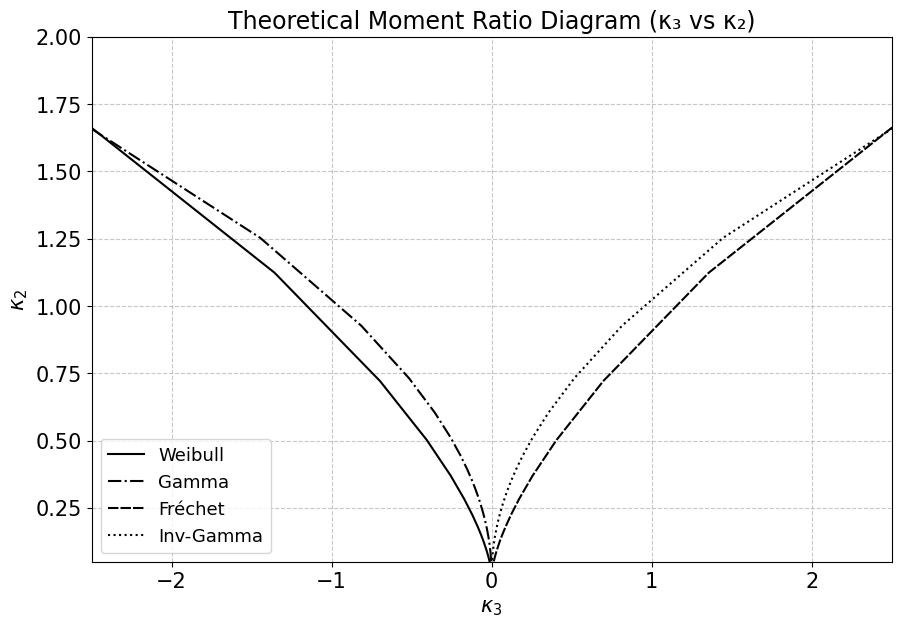

In [97]:
# --- SECTION: Plotting Theoretical Moment Ratio Diagram (Fig1a.png) ---

font_size_plot = 15  # Using a more descriptive name for font size variable

# Create a new figure for the plot
plt.figure(figsize=(10, 7)) # Added figure size for potentially better layout

# Plotting the theoretical kappa_3 vs kappa_2 curves for each distribution
# Each plot function returns a line object, which can be used for legends if needed,
# but plt.legend() will automatically pick up labels if provided.
plt.plot(valores_k3_w, valores_k2_w, color="black", linestyle="solid", label="Weibull")
plt.plot(valores_k3_g, valores_k2_g, color="black", linestyle="dashdot", label="Gamma")
plt.plot(valores_k3_f, valores_k2_f, color="black", linestyle="dashed", dashes=(5, 1), label="Fréchet")
plt.plot(valores_k3_ll, valores_k2_ll, color="black", linestyle="dotted", label="Inv-Gamma")

# Adjusting the x-axis

plt.xlabel("$\\kappa_3$", fontsize=font_size_plot) # Kappa_3 (L-skewness related)
plt.xticks(fontsize=font_size_plot)
plt.xlim(-2.5, 2.5)

# Adjusting the y-axis

plt.ylabel("$\\kappa_2$", fontsize=font_size_plot) # Kappa_2 (L-CV related)
plt.yticks(fontsize=font_size_plot)
plt.ylim(0.05, 2.0)

# Activating the legend

plt.legend(fontsize=font_size_plot - 2) # Slightly smaller font for legend to avoid clutter

# Adding a title and grid for better readability
plt.title("Theoretical Moment Ratio Diagram (κ₃ vs κ₂)", fontsize=font_size_plot + 2)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust subplot parameters to give specified padding
# This can help ensure labels and titles are not cut off when saving.
plt.subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95) # Adjusted for title

# Save the figure
plt.savefig('Fig1a.png', dpi=1200)

# It's good practice to close the plot if not displaying interactively
# or if multiple plots are being generated in a script, to free memory.
#plt.close()

#print("Plot 'Fig1a.png' (Theoretical Moment Ratio Diagram) saved.")

In [98]:
# --- SECTION: Applications - Datasets Definition ---

# These are the various datasets that will be used for the bootstrap analysis.
# Each dataset is a list of numerical observations.
# The names are kept as in the original script.

genfan_data = [450, 460, 1150, 1150, 1560, 1600, 1660, 1850, 1850, 1850, 1850, 1850, 2030, 2030, 2030, 2070, 2070, 2080, 2200, 3000, 3000, 3000, 3000, 3100, 3200, 3450, 3750, 3750, 4150, 4150, 4150, 4150, 4300, 4300, 4300, 4300, 4600, 4850, 4850, 4850, 4850, 5000, 5000, 5000, 6100, 6100, 6100, 6100, 6300, 6450, 6450, 6700, 7450, 7800, 7800, 8100, 8100, 8200, 8500, 8500, 8500, 8750, 8750, 8750, 9400, 9900, 10100, 10100, 10100, 11500]
kevlar_data = [1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 9, 9, 10, 10, 11, 11, 12, 13, 18, 19, 20, 23, 24, 24, 29, 34, 35, 36, 38, 40, 42, 43, 52, 54, 56, 60, 60, 63, 65, 67, 68, 72, 72, 72, 73, 79, 79, 80, 80, 83, 85, 90, 92, 95, 99, 100, 101, 102, 103, 105, 110, 110, 111, 115, 118, 120, 129, 131, 133, 134, 140, 143, 145, 150, 151, 152, 153, 154, 154, 155, 158, 160, 163, 164, 180, 180, 181, 202, 205, 214, 217, 233, 303, 303, 334, 420, 469, 789]
carfibres_data = [0.39, 0.81, 0.85, 0.98, 1.08, 1.12, 1.17, 1.18, 1.22, 1.25, 1.36, 1.41, 1.47, 1.57, 1.57, 1.59, 1.59, 1.61, 1.61, 1.69, 1.69, 1.71, 1.73, 1.80, 1.84, 1.84, 1.87, 1.90, 1.92, 2.00, 2.03, 2.03, 2.05, 2.12, 2.17, 2.17, 2.17, 2.35, 2.38, 2.41, 2.43, 2.48, 2.48, 2.50, 2.53, 2.55, 2.55, 2.56, 2.59, 2.67, 2.73, 2.74, 2.76, 2.77, 2.79, 2.81, 2.81, 2.82, 2.83, 2.85, 2.87, 2.88, 2.93, 2.95, 2.96, 2.97, 2.97, 3.09, 3.11, 3.11, 3.15, 3.15, 3.19, 3.19, 3.22, 3.22, 3.27, 3.28, 3.31, 3.31, 3.33, 3.39, 3.39, 3.51, 3.56, 3.60, 3.65, 3.68, 3.68, 3.68, 3.70, 3.75, 4.20, 4.38, 4.42, 4.70, 4.90, 4.91, 5.08, 5.56]
tstrength_data = [0.312, 0.944, 1.063, 1.272, 1.434, 1.566, 1.697, 1.848, 2.128, 0.314, 0.958, 1.098, 1.274, 1.435, 1.570, 1.726, 1.880, 2.233, 0.479, 0.966, 1.140, 1.301, 1.478, 1.586, 1.770, 1.954, 2.433, 0.552, 0.997, 1.179, 1.301, 1.490, 1.629, 1.773, 2.012, 2.585, 0.700, 1.006, 1.224, 1.359, 1.511, 1.633, 1.800, 2.067, 2.585, 0.803, 1.021, 1.240, 1.382, 1.514, 1.642, 1.809, 2.084, 0.861, 1.027, 1.253, 1.382, 1.535, 1.648, 1.818, 2.090, 0.865, 1.055, 1.270, 1.426, 1.554, 1.684, 1.821, 2.096]
repairable_data = [1.43, 0.11, 0.71, 0.77, 2.63, 1.49, 3.46, 2.46, 0.59, 0.74, 1.23, 0.94, 4.36, 0.40, 1.74, 4.73, 2.23, 0.45, 0.70, 1.06, 1.46, 0.30, 1.82, 2.37, 0.63, 1.23, 1.24, 1.97, 1.86, 1.17]
airplanewin_data = [18.830, 20.800, 21.657, 23.030, 23.230, 24.050, 24.321, 25.500, 25.520, 25.800, 26.690, 26.770, 26.780, 27.050, 27.670, 29.900, 31.110, 33.200, 33.730, 33.760, 33.890, 34.760, 35.750, 35.910, 36.980, 37.080, 37.090, 39.580, 44.045, 45.290, 45.381]
acutebcancer_data = [0.09, 0.76, 1.81, 1.10, 3.72, 0.72, 2.49, 1.00, 0.53, 0.66, 31.61, 0.60, 0.20, 1.61, 1.88, 0.70, 1.36, 0.43, 3.16, 1.57, 4.93, 11.07, 1.63, 1.39, 4.54, 3.12, 86.01, 1.92, 0.92, 4.04, 1.16, 2.26, 0.20, 0.94, 1.82, 3.99, 1.46, 2.75, 1.38, 2.76, 1.86, 2.68, 1.76, 0.67, 1.29, 1.56, 2.83, 0.71, 1.48, 2.41, 0.66, 0.65, 2.36, 1.29, 13.75, 0.67, 3.70, 0.76, 3.63, 0.68, 2.65, 0.95, 2.30, 2.57, 0.61, 3.93, 1.56, 1.29, 9.94, 1.67, 1.42, 4.18, 1.30]
pet_data = [7131.00, 8482.00, 8559.00, 8762.00, 9026.00, 9034.00, 9104.00, 9104.25, 9104.25, 9104.25, 50.25, 87.75, 87.76, 87.77, 92.90, 92.91, 95.96, 108.30, 108.30, 117.90, 123.90, 124.30, 129.70, 135.60, 135.60, 15.17, 19.87, 20.18, 21.50, 21.88, 22.23, 23.02, 23.90, 28.17, 29.70, 2.40, 2.42, 3.17, 3.75, 4.65, 4.95, 6.23, 6.68, 7.30]
meeker_data = [0.28, 0.32, 0.38, 0.62, 0.22, 0.24, 0.26, 0.38, 0.41, 0.46, 0.54, 0.81, 0.25, 0.29, 0.32, 0.48, 0.25, 0.26, 0.42, 0.57, 0.32, 0.36, 0.45, 0.58, 0.36, 0.41, 0.52, 0.70, 0.24, 0.28, 0.34, 0.55, 0.33, 0.40, 0.44, 0.85, 0.40, 0.47, 0.72, 1.05, 0.88, 1.19, 2.06, 3.15, 0.53, 0.64, 0.99, 1.60, 0.47, 0.62, 1.00, 1.50, 0.57, 0.75, 1.26, 2.03, 0.55, 0.67, 1.09, 1.79, 0.78, 0.96, 1.48, 2.27, 0.83, 1.12, 1.96, 3.29, 0.64, 0.80, 1.23, 1.84, 0.55, 0.74, 1.29, 2.03, 0.87, 1.29, 2.62, 4.44, 1.25, 1.88, 3.54, 5.23, 2.64, 3.78, 7.01, 11.12, 0.98, 1.36, 2.66, 4.42, 1.62, 2.34, 3.82, 6.14, 1.59, 2.41, 3.46, 6.75, 2.29, 2.24, 6.30, 8.34, 0.98, 1.37, 2.47, 3.74, 1.04, 1.54, 2.77, 4.16, 1.19, 1.59, 3.03, 4.52]


# These datasets are listed under the "New data" heading in the original script.
ball_data = [17.88, 28.92, 33.00, 41.52, 42.12, 45.60, 48.48, 51.84,51.96, 54.12, 55.56, 67.80, 68.64, 68.64, 68.88, 84.12, 93.12, 98.64, 105.12, 105.84, 127.92, 128.04, 173.40]
air_data = [0.28,0.32,0.38,0.62,0.22,0.24,0.26,0.38,0.41,0.46,0.54,
0.81,0.25,0.29,0.32,0.48,0.25,0.26,0.42,0.57,0.32,0.36,
0.45,0.58,0.36,0.41,0.52,0.70,0.24,0.28,0.34,0.55,0.33,
0.40,0.44,0.85,0.40,0.47,0.72,1.05,0.88,1.19,2.06,3.15,
0.53,0.64,0.99,1.60,0.47,0.62,1.00,1.50,0.57,0.75,1.26,
2.03,0.55,0.67,1.09,1.79,0.78,0.96,1.48,2.27,0.83,1.12,
1.96,3.29,0.64,0.80,1.23,1.84,0.55,0.74,1.29,2.03,0.87,
1.29,2.62,4.44,1.25,1.88,3.54,5.23,2.64,3.78,7.01,11.12,
0.98,1.36,2.66,4.42,1.62,2.34,3.82,6.14,1.59,2.41,3.46,
6.75,2.29,2.24,6.30,8.34,0.98,1.37,2.47,3.74,1.04,1.54,
2.77,4.16,1.19,1.59,3.03,4.52]
yarn_data = [86, 156, 251, 653, 98, 249, 400, 292, 131, 169, 175, 176, 76, 264, 15, 364, 195, 262, 88, 264, 157, 220, 42, 321, 180, 198, 38, 20, 61, 121,
282, 224, 149, 180, 325, 250, 196, 90, 229, 166, 38, 337, 65, 151, 341,
40, 40, 135, 597, 246, 211, 180, 93, 315, 353, 571, 124, 279, 81, 186,
497, 182, 423, 185, 229, 400, 338, 290, 398, 71, 246, 185, 188, 568, 55,
55, 61, 244, 20, 284, 393, 396, 203, 829, 239, 236, 286, 194, 277, 143,
198, 264, 105, 203, 124, 137, 135, 350, 193, 188]
airborne_data = [0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 1, 1, 1, 1, 1.1, 1.3, 1.5, 1.5,
                 1.5, 1.5, 2, 2, 2.2, 2.5, 2.7, 3, 3, 3.3, 4, 4, 4.5, 4.7, 5, 5.4, 5.4, 7, 7.5, 8.8, 9, 10.2, 22, 24.5]
failure_data = [1.2, 2.2, 4.9, 5.0, 6.8, 7.0, 12.1, 13.7, 15.1, 15.2, 23.9, 24.3, 25.1, 35.8,
                38.9, 47.9, 48.4, 49.3, 53.2, 55.6, 62.7, 72.4, 73.6, 76.8, 83.8, 95.1, 97.9, 99.6, 102.8, 108.5,
                128.7, 133.6, 144.1, 147.6, 150.6, 151.6, 152.6, 164.2, 166.8, 178.6, 185.2, 187.1, 203.0, 204.3,
                229.5, 253.1, 304.1, 341.7, 354.4]
aircondition_data = [90, 10, 60, 186, 61, 49, 14, 24, 56, 20, 79, 84, 44, 59, 29, 118, 25,
                   156, 310, 76, 26, 44, 23, 62, 130, 208, 70, 101, 208]

# --- Grouping datasets into a dictionary for easier iteration ---
# This dictionary maps a descriptive name (key) to the actual data list (value).
# This structure will simplify the subsequent bootstrap analysis and plotting.
datasets_for_analysis = {
    "Genfan": genfan_data,
    "Kevlar": kevlar_data,
    "Carfibres": carfibres_data,
    "TStrength": tstrength_data,
    "Repairable": repairable_data,
    "AirplaneWin": airplanewin_data,
    "AcuteBCancer": acutebcancer_data,
    "PET": pet_data,
    "Meeker": meeker_data, # Note: 'meeker' was originally labeled 'RES' in one of the plots
    "Ball": ball_data,
    "Air": air_data, # Note: 'air' was originally labeled 'Airplane' in one of the plots
    "Yarn": yarn_data,
    "Airborne": airborne_data,
    "Failure": failure_data,
    "AirCondition": aircondition_data
}

In [99]:
# --- SECTION: Helper Function for Log-Moment Calculation ---

def mv(data_sample: list, v_order: int) -> float:
    """
    Calculates the v_order-th sample moment of the logarithm of the data.

    This function first takes the natural logarithm of each data point in the
    sample, then raises it to the power of 'v_order', sums these values,
    and finally divides by the number of data points to get the average.

    Args:
        data_sample (list or np.array): The input data sample.
                                         It is assumed that all elements are
                                         positive, as np.log() is undefined
                                         for non-positive values.
        v_order (int): The order of the moment to calculate for the
                       log-transformed data (e.g., 1 for mean of logs,
                       2 for mean of squared logs).

    Returns:
        float: The calculated v-th sample moment of log(data_sample).
               Returns np.nan if data_sample is empty or if any element
               causes a math error during log or power calculation (e.g.,
               log of non-positive number).
    """
    if not data_sample: # Check for an empty list
        # print(f"Warning: mv function received an empty data_sample for v_order={v_order}. Returning NaN.")
        return np.nan


    # English: "calculating the sum"
    current_sum = 0.0 # Initialize sum as a float
    valid_points_count = 0

    for x_val in data_sample:
        if x_val <= 0:
            # Logarithm is undefined for non-positive numbers.
            # print(f"Warning: Non-positive value ({x_val}) encountered in mv for v_order={v_order}. Skipping value.")
            continue # Skip this value

        try:
            log_x_val = np.log(x_val)
            current_sum += log_x_val**v_order
            valid_points_count += 1
        except (ValueError, FloatingPointError) as e:
            # Catch potential math errors from log or power, e.g., overflow
            # print(f"Warning: Math error for value {x_val} in mv (v_order={v_order}): {e}. Skipping value.")
            continue # Skip this value

    if valid_points_count == 0:
        # This happens if all points were invalid (e.g., non-positive, or caused math errors)
        # print(f"Warning: No valid points to calculate moment in mv for v_order={v_order}. Returning NaN.")
        return np.nan

    # English: "dividing by the number of elements in the database (or rather, valid points)"
    result = current_sum / valid_points_count

    # English: "returning the result"
    return result

In [100]:
# --- SECTION: Bootstrap Analysis for Dataset 1: "ball_data" ---

# Calculate the number of samples for each bootstrap iteration.
# This is set to 90% of the original dataset's length.
# Ensure 'ball_data' is defined from the "Datasets Definition" section.
if 'ball_data' in locals() or 'ball_data' in globals():
    if len(ball_data) > 0:
        # Calculate the number of samples for each bootstrap iteration (90% of original size)
        # Ensure at least 1 sample if the dataset is very small.
        num_bootstrap_samples_ball = max(1, int(len(ball_data) * 0.9))
    else:
        print("Warning: 'ball_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_ball = 0 # Set to 0 to skip loop
else:
    print("Error: 'ball_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_ball = 0 # Set to 0 to skip loop

# np.random.seed(1) # Moved to the top of the script for global reproducibility.
                  # Setting it here would reset the seed for each dataset's bootstrap,
                  # which is usually not the desired behavior if you want the entire
                  # script's random processes to be reproducible from a single seed.

# English: "variables to save the result of each generation"
K2_ball_bootstrap = []  # List to store kappa_2 values from bootstrap samples for 'ball_data'
K3_ball_bootstrap = []  # List to store kappa_3 values from bootstrap samples for 'ball_data'

N_BOOTSTRAPS_BALL = 1000 # Number of bootstrap iterations for this dataset


# English: "generating N bootstraps"
if num_bootstrap_samples_ball > 0: # Proceed only if dataset is valid
    for _ in range(N_BOOTSTRAPS_BALL): # Use underscore if loop variable 'i' is not used

        # Original Portuguese comment: "gerando um bootstrap"
        # English: "generating a bootstrap"
        # Resample the 'ball_data' with replacement to create a bootstrap sample.
        bootstrap_sample_ball = resample(ball_data,
                                         replace=True,
                                         n_samples=num_bootstrap_samples_ball)

        # Original Portuguese comment: "gerando um k2 e um k3 para cada sacola gerada"
        # English: "generating a k2 and k3 for each generated sample (bag)"
        # Calculate moments of the log-transformed bootstrap sample
        mv1_ball = mv(bootstrap_sample_ball, 1)
        mv2_ball = mv(bootstrap_sample_ball, 2)
        mv3_ball = mv(bootstrap_sample_ball, 3)

        # Check if mv calculations returned NaN (e.g., due to non-positive values in sample)
        if not np.isnan(mv1_ball) and not np.isnan(mv2_ball) and not np.isnan(mv3_ball):
            # Calculate kappa_2 (variance of log-data)
            kappa2_ball = mv2_ball - mv1_ball**2
            # Calculate kappa_3 (third central moment of log-data, related to skewness)
            kappa3_ball = mv3_ball - 3 * mv1_ball * mv2_ball + 2 * mv1_ball**3

            # Original Portuguese comment: "salvando os valores na lista maior"
            # English: "saving the values in the main list"
            K2_ball_bootstrap.append(kappa2_ball)
            K3_ball_bootstrap.append(kappa3_ball)
        # else:
            # Optional: print a warning or log if a bootstrap sample leads to NaN moments
            # print(f"Warning: NaN encountered in moment calculation for a bootstrap sample of 'ball_data'. Skipping this iteration.")

    # Store results in the main dictionary (if you are using the dictionary approach from my previous combined suggestion)
    # If not, K2_ball_bootstrap and K3_ball_bootstrap hold the results for this specific dataset.
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Ball"] = (K3_ball_bootstrap, K2_ball_bootstrap)
    else: # If running standalone, print a summary or store locally
        print(f"Bootstrap for 'ball_data' completed. Found {len(K2_ball_bootstrap)} valid kappa pairs.")

else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Ball"] = ([], []) # Store empty lists if not processed
    print(f"Bootstrap for 'ball_data' was skipped due to empty or undefined dataset.")

In [101]:
# --- SECTION: Bootstrap Analysis for Dataset 2: "air_data" ---

# English: "portion of random data" (referring to bootstrap sample size)

# Ensure 'air_data' is defined from the "Datasets Definition" section.
if 'air_data' in locals() or 'air_data' in globals():
    if len(air_data) > 0:
        # Calculate the number of samples for each bootstrap iteration (90% of original size)
        num_bootstrap_samples_air = max(1, int(len(air_data) * 0.9))
    else:
        print("Warning: 'air_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_air = 0 # Set to 0 to skip loop
else:
    print("Error: 'air_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_air = 0 # Set to 0 to skip loop

# np.random.seed(1) # Reminder: Global seed is set at the top of the script.
                  # Re-setting it here would make this dataset's bootstrap sequence
                  # identical to the previous one if it also used seed(1).

# English: "variables to save the result of each generation"
K2_air_bootstrap = []  # List to store kappa_2 values for 'air_data'
K3_air_bootstrap = []  # List to store kappa_3 values for 'air_data'

N_BOOTSTRAPS_AIR = 1000 # Number of bootstrap iterations for this dataset

# English: "generating N bootstraps"
if num_bootstrap_samples_air > 0: # Proceed only if dataset is valid
    for _ in range(N_BOOTSTRAPS_AIR):

        # Original Portuguese comment: "gerando um bootstrap"
        # English: "generating a bootstrap"
        bootstrap_sample_air = resample(air_data,
                                        replace=True,
                                        n_samples=num_bootstrap_samples_air)


        # English: "generating a k2 and k3 for each generated sample (bag)"
        mv1_air = mv(bootstrap_sample_air, 1)
        mv2_air = mv(bootstrap_sample_air, 2)
        mv3_air = mv(bootstrap_sample_air, 3)

        if not np.isnan(mv1_air) and not np.isnan(mv2_air) and not np.isnan(mv3_air):
            kappa2_air = mv2_air - mv1_air**2
            kappa3_air = mv3_air - 3 * mv1_air * mv2_air + 2 * mv1_air**3

               # English: "saving the values in the main list"
            K2_air_bootstrap.append(kappa2_air)
            K3_air_bootstrap.append(kappa3_air)
        # else:
            # print(f"Warning: NaN encountered in moment calculation for a bootstrap sample of 'air_data'. Skipping.")

    # Storing results (optional, depends on overall script structure)
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        # Assuming 'air_data' was originally labeled 'Airplane' in plots based on prior context
        bootstrap_k_values["Airplane"] = (K3_air_bootstrap, K2_air_bootstrap)
    else:
        print(f"Bootstrap for 'air_data' completed. Found {len(K2_air_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Airplane"] = ([], [])
    print(f"Bootstrap for 'air_data' was skipped due to empty or undefined dataset.")

In [102]:
# --- SECTION: Bootstrap Analysis for Dataset 3: "yarn_data" ---

# Ensure 'yarn_data' is defined from the "Datasets Definition" section.
if 'yarn_data' in locals() or 'yarn_data' in globals():
    if len(yarn_data) > 0:
        # Calculate the number of samples for each bootstrap iteration (90% of original size)
        num_bootstrap_samples_yarn = max(1, int(len(yarn_data) * 0.9))
    else:
        print("Warning: 'yarn_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_yarn = 0
else:
    print("Error: 'yarn_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_yarn = 0

# np.random.seed(1) # Global seed is set at the top.

K2_yarn_bootstrap = []  # List to store kappa_2 values for 'yarn_data'
K3_yarn_bootstrap = []  # List to store kappa_3 values for 'yarn_data'

N_BOOTSTRAPS_YARN = 1000 # Number of bootstrap iterations for this dataset

# Generating N bootstraps
if num_bootstrap_samples_yarn > 0:
    for _ in range(N_BOOTSTRAPS_YARN):

        # Generating a bootstrap sample
        bootstrap_sample_yarn = resample(yarn_data,  # CORRIGIDO: Indentação alinhada
                                         replace=True,
                                         n_samples=num_bootstrap_samples_yarn)

        # Generating a k2 and k3 for each generated sample (bag)
        mv1_yarn = mv(bootstrap_sample_yarn, 1)
        mv2_yarn = mv(bootstrap_sample_yarn, 2)
        mv3_yarn = mv(bootstrap_sample_yarn, 3)

        if not np.isnan(mv1_yarn) and not np.isnan(mv2_yarn) and not np.isnan(mv3_yarn):
            kappa2_yarn = mv2_yarn - mv1_yarn**2
            kappa3_yarn = mv3_yarn - 3 * mv1_yarn * mv2_yarn + 2 * mv1_yarn**3

            # Saving the values in the main list
            K2_yarn_bootstrap.append(kappa2_yarn)
            K3_yarn_bootstrap.append(kappa3_yarn)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'yarn_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Yarn"] = (K3_yarn_bootstrap, K2_yarn_bootstrap)
    else:
        print(f"Bootstrap for 'yarn_data' completed. Found {len(K2_yarn_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Yarn"] = ([], [])
    print(f"Bootstrap for 'yarn_data' was skipped due to empty or undefined dataset.")

In [103]:
# --- SECTION: Bootstrap Analysis for Dataset 4: "tstrength_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'tstrength_data' is defined from the "Datasets Definition" section.
if 'tstrength_data' in locals() or 'tstrength_data' in globals():
    if len(tstrength_data) > 0:
        # Calculate the number of samples for each bootstrap iteration (90% of original size)
        num_bootstrap_samples_tstrength = max(1, int(len(tstrength_data) * 0.9))
    else:
        print("Warning: 'tstrength_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_tstrength = 0
else:
    print("Error: 'tstrength_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_tstrength = 0

# Note: np.random.seed(1) was NOT set here in the original script for this specific dataset.
# The global seed set at the beginning of the script will influence the resampling here.
# If a specific seed for this dataset was intended, it should be set right before the loop.

# Variables to store the result of each generation
K2_tstrength_bootstrap = []  # List to store kappa_2 values for 'tstrength_data'
K3_tstrength_bootstrap = []  # List to store kappa_3 values for 'tstrength_data'

N_BOOTSTRAPS_TSTRENGTH = 1000 # Number of bootstrap iterations

# Generating N bootstraps
if num_bootstrap_samples_tstrength > 0:
    for _ in range(N_BOOTSTRAPS_TSTRENGTH):

        # Generating a bootstrap sample
        bootstrap_sample_tstrength = resample(tstrength_data,
                                              replace=True,
                                              n_samples=num_bootstrap_samples_tstrength)

        # Generating a k2 and k3 for each generated sample (bag)
        mv1_tstrength = mv(bootstrap_sample_tstrength, 1)
        mv2_tstrength = mv(bootstrap_sample_tstrength, 2)
        mv3_tstrength = mv(bootstrap_sample_tstrength, 3)

        if not np.isnan(mv1_tstrength) and not np.isnan(mv2_tstrength) and not np.isnan(mv3_tstrength):
            kappa2_tstrength = mv2_tstrength - mv1_tstrength**2
            kappa3_tstrength = mv3_tstrength - 3 * mv1_tstrength * mv2_tstrength + 2 * mv1_tstrength**3

            # Saving the values in the main list
            K2_tstrength_bootstrap.append(kappa2_tstrength)
            K3_tstrength_bootstrap.append(kappa3_tstrength)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'tstrength_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["TStrength"] = (K3_tstrength_bootstrap, K2_tstrength_bootstrap)
    else:
        print(f"Bootstrap for 'tstrength_data' completed. Found {len(K2_tstrength_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["TStrength"] = ([], [])
    print(f"Bootstrap for 'tstrength_data' was skipped due to empty or undefined dataset.")

In [104]:
# --- SECTION: Bootstrap Analysis for Dataset 5: "repairable_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'repairable_data' is defined from the "Datasets Definition" section.
if 'repairable_data' in locals() or 'repairable_data' in globals():
    if len(repairable_data) > 0:
        num_bootstrap_samples_repairable = max(1, int(len(repairable_data) * 0.9))
    else:
        print("Warning: 'repairable_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_repairable = 0
else:
    print("Error: 'repairable_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_repairable = 0

# Variables to store the result of each generation
K2_repairable_bootstrap = []
K3_repairable_bootstrap = []

N_BOOTSTRAPS_REPAIRABLE = 1000

# Generating N bootstraps
if num_bootstrap_samples_repairable > 0:
    for _ in range(N_BOOTSTRAPS_REPAIRABLE):

        # Generating a bootstrap sample
        bootstrap_sample_repairable = resample(repairable_data,
                                               replace=True,
                                               n_samples=num_bootstrap_samples_repairable)

        # Generating a k2 and k3 for each generated sample
        mv1_repairable = mv(bootstrap_sample_repairable, 1)
        mv2_repairable = mv(bootstrap_sample_repairable, 2)
        mv3_repairable = mv(bootstrap_sample_repairable, 3)

        if not np.isnan(mv1_repairable) and not np.isnan(mv2_repairable) and not np.isnan(mv3_repairable):
            kappa2_repairable = mv2_repairable - mv1_repairable**2
            kappa3_repairable = mv3_repairable - 3 * mv1_repairable * mv2_repairable + 2 * mv1_repairable**3

            # Saving the values
            K2_repairable_bootstrap.append(kappa2_repairable)
            K3_repairable_bootstrap.append(kappa3_repairable)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'repairable_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Repairable"] = (K3_repairable_bootstrap, K2_repairable_bootstrap)
    else:
        print(f"Bootstrap for 'repairable_data' completed. Found {len(K2_repairable_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Repairable"] = ([], [])
    print(f"Bootstrap for 'repairable_data' was skipped due to empty or undefined dataset.")

In [105]:
# --- SECTION: Bootstrap Analysis for Dataset 6: "airplanewin_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'airplanewin_data' is defined from the "Datasets Definition" section.
if 'airplanewin_data' in locals() or 'airplanewin_data' in globals():
    if len(airplanewin_data) > 0:
        num_bootstrap_samples_airplanewin = max(1, int(len(airplanewin_data) * 0.9))
    else:
        print("Warning: 'airplanewin_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_airplanewin = 0
else:
    print("Error: 'airplanewin_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_airplanewin = 0

# Variables to store the result of each generation
K2_airplanewin_bootstrap = []
K3_airplanewin_bootstrap = []

# Number of bootstrap iterations for this dataset (original script used 10000)
N_BOOTSTRAPS_AIRPLANEWIN = 10000

# Generating N bootstraps
if num_bootstrap_samples_airplanewin > 0:
    for _ in range(N_BOOTSTRAPS_AIRPLANEWIN):

        # Generating a bootstrap sample
        bootstrap_sample_airplanewin = resample(airplanewin_data,
                                                replace=True,
                                                n_samples=num_bootstrap_samples_airplanewin)

        # Generating a k2 and k3 for each generated sample
        mv1_airplanewin = mv(bootstrap_sample_airplanewin, 1)
        mv2_airplanewin = mv(bootstrap_sample_airplanewin, 2)
        mv3_airplanewin = mv(bootstrap_sample_airplanewin, 3)

        if not np.isnan(mv1_airplanewin) and not np.isnan(mv2_airplanewin) and not np.isnan(mv3_airplanewin):
            kappa2_airplanewin = mv2_airplanewin - mv1_airplanewin**2
            kappa3_airplanewin = mv3_airplanewin - 3 * mv1_airplanewin * mv2_airplanewin + 2 * mv1_airplanewin**3

            # Saving the values
            K2_airplanewin_bootstrap.append(kappa2_airplanewin)
            K3_airplanewin_bootstrap.append(kappa3_airplanewin)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'airplanewin_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["AirplaneWin"] = (K3_airplanewin_bootstrap, K2_airplanewin_bootstrap)
    else:
        print(f"Bootstrap for 'airplanewin_data' completed. Found {len(K2_airplanewin_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["AirplaneWin"] = ([], [])
    print(f"Bootstrap for 'airplanewin_data' was skipped due to empty or undefined dataset.")

In [106]:
# --- SECTION: Bootstrap Analysis for Dataset 7: "acutebcancer_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'acutebcancer_data' is defined from the "Datasets Definition" section.
if 'acutebcancer_data' in locals() or 'acutebcancer_data' in globals():
    if len(acutebcancer_data) > 0:
        num_bootstrap_samples_acutebcancer = max(1, int(len(acutebcancer_data) * 0.9))
    else:
        print("Warning: 'acutebcancer_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_acutebcancer = 0
else:
    print("Error: 'acutebcancer_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_acutebcancer = 0

# Variables to store the result of each generation
K2_acutebcancer_bootstrap = []
K3_acutebcancer_bootstrap = []

N_BOOTSTRAPS_ACUTEBCANCER = 1000

# Generating N bootstraps
if num_bootstrap_samples_acutebcancer > 0:
    for _ in range(N_BOOTSTRAPS_ACUTEBCANCER):

        # Generating a bootstrap sample
        bootstrap_sample_acutebcancer = resample(acutebcancer_data,
                                                 replace=True,
                                                 n_samples=num_bootstrap_samples_acutebcancer)

        # Generating a k2 and k3 for each generated sample
        mv1_acutebcancer = mv(bootstrap_sample_acutebcancer, 1)
        mv2_acutebcancer = mv(bootstrap_sample_acutebcancer, 2)
        mv3_acutebcancer = mv(bootstrap_sample_acutebcancer, 3)

        if not np.isnan(mv1_acutebcancer) and not np.isnan(mv2_acutebcancer) and not np.isnan(mv3_acutebcancer):
            kappa2_acutebcancer = mv2_acutebcancer - mv1_acutebcancer**2
            kappa3_acutebcancer = mv3_acutebcancer - 3 * mv1_acutebcancer * mv2_acutebcancer + 2 * mv1_acutebcancer**3

            # Saving the values
            K2_acutebcancer_bootstrap.append(kappa2_acutebcancer)
            K3_acutebcancer_bootstrap.append(kappa3_acutebcancer)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'acutebcancer_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["AcuteBCancer"] = (K3_acutebcancer_bootstrap, K2_acutebcancer_bootstrap)
    else:
        print(f"Bootstrap for 'acutebcancer_data' completed. Found {len(K2_acutebcancer_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["AcuteBCancer"] = ([], [])
    print(f"Bootstrap for 'acutebcancer_data' was skipped due to empty or undefined dataset.")

In [107]:
# --- SECTION: Bootstrap Analysis for Dataset 8: "pet_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'pet_data' is defined from the "Datasets Definition" section.
if 'pet_data' in locals() or 'pet_data' in globals():
    if len(pet_data) > 0:
        num_bootstrap_samples_pet = max(1, int(len(pet_data) * 0.9))
    else:
        print("Warning: 'pet_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_pet = 0
else:
    print("Error: 'pet_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_pet = 0

# Variables to store the result of each generation
K2_pet_bootstrap = []
K3_pet_bootstrap = []

N_BOOTSTRAPS_PET = 1000

# Generating N bootstraps
if num_bootstrap_samples_pet > 0:
    for _ in range(N_BOOTSTRAPS_PET):

        # Generating a bootstrap sample
        bootstrap_sample_pet = resample(pet_data,
                                        replace=True,
                                        n_samples=num_bootstrap_samples_pet)

        # Generating a k2 and k3 for each generated sample
        mv1_pet = mv(bootstrap_sample_pet, 1)
        mv2_pet = mv(bootstrap_sample_pet, 2)
        mv3_pet = mv(bootstrap_sample_pet, 3)

        if not np.isnan(mv1_pet) and not np.isnan(mv2_pet) and not np.isnan(mv3_pet):
            kappa2_pet = mv2_pet - mv1_pet**2
            kappa3_pet = mv3_pet - 3 * mv1_pet * mv2_pet + 2 * mv1_pet**3

            # Saving the values
            K2_pet_bootstrap.append(kappa2_pet)
            K3_pet_bootstrap.append(kappa3_pet)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'pet_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["PET"] = (K3_pet_bootstrap, K2_pet_bootstrap)
    else:
        print(f"Bootstrap for 'pet_data' completed. Found {len(K2_pet_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["PET"] = ([], [])
    print(f"Bootstrap for 'pet_data' was skipped due to empty or undefined dataset.")

In [108]:
# --- SECTION: Bootstrap Analysis for Dataset 9: "meeker_data" ---

# Note: Original script had '2#' at the beginning of the first comment line for this block.
# Portion of random data for bootstrap sample size
# Ensure 'meeker_data' is defined from the "Datasets Definition" section.
if 'meeker_data' in locals() or 'meeker_data' in globals():
    if len(meeker_data) > 0:
        num_bootstrap_samples_meeker = max(1, int(len(meeker_data) * 0.9))
    else:
        print("Warning: 'meeker_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_meeker = 0
else:
    print("Error: 'meeker_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_meeker = 0

# Variables to store the result of each generation
K2_meeker_bootstrap = []
K3_meeker_bootstrap = []

# Number of bootstrap iterations for this dataset (original script used 10000)
N_BOOTSTRAPS_MEEKER = 10000

# Generating N bootstraps
if num_bootstrap_samples_meeker > 0:
    for _ in range(N_BOOTSTRAPS_MEEKER):

        # Generating a bootstrap sample
        bootstrap_sample_meeker = resample(meeker_data,
                                           replace=True,
                                           n_samples=num_bootstrap_samples_meeker)

        # Generating a k2 and k3 for each generated sample
        mv1_meeker = mv(bootstrap_sample_meeker, 1)
        mv2_meeker = mv(bootstrap_sample_meeker, 2)
        mv3_meeker = mv(bootstrap_sample_meeker, 3)

        if not np.isnan(mv1_meeker) and not np.isnan(mv2_meeker) and not np.isnan(mv3_meeker):
            kappa2_meeker = mv2_meeker - mv1_meeker**2
            kappa3_meeker = mv3_meeker - 3 * mv1_meeker * mv2_meeker + 2 * mv1_meeker**3

            # Saving the values
            K2_meeker_bootstrap.append(kappa2_meeker)
            K3_meeker_bootstrap.append(kappa3_meeker)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'meeker_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        # The plot section sometimes referred to K2_9/K3_9 as 'RES' (Resistors?)
        # Using "Meeker" as the key, consistent with the data variable name.
        bootstrap_k_values["Meeker"] = (K3_meeker_bootstrap, K2_meeker_bootstrap)
    else:
        print(f"Bootstrap for 'meeker_data' completed. Found {len(K2_meeker_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Meeker"] = ([], [])
    print(f"Bootstrap for 'meeker_data' was skipped due to empty or undefined dataset.")

In [109]:
# --- SECTION: Bootstrap Analysis for Dataset 10: "kevlar_data" ---

# Note: Original script had '6#' at the beginning of the first comment line for this block.
# Portion of random data for bootstrap sample size
# Ensure 'kevlar_data' is defined from the "Datasets Definition" section.
if 'kevlar_data' in locals() or 'kevlar_data' in globals():
    if len(kevlar_data) > 0:
        num_bootstrap_samples_kevlar = max(1, int(len(kevlar_data) * 0.9))
    else:
        print("Warning: 'kevlar_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_kevlar = 0
else:
    print("Error: 'kevlar_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_kevlar = 0

# Variables to store the result of each generation
K2_kevlar_bootstrap = []
K3_kevlar_bootstrap = []

# Number of bootstrap iterations for this dataset (original script used 10000)
N_BOOTSTRAPS_KEVLAR = 10000

# Generating N bootstraps
if num_bootstrap_samples_kevlar > 0:
    for _ in range(N_BOOTSTRAPS_KEVLAR):

        # Generating a bootstrap sample
        bootstrap_sample_kevlar = resample(kevlar_data,
                                           replace=True,
                                           n_samples=num_bootstrap_samples_kevlar)

        # Generating a k2 and k3 for each generated sample
        mv1_kevlar = mv(bootstrap_sample_kevlar, 1)
        mv2_kevlar = mv(bootstrap_sample_kevlar, 2)
        mv3_kevlar = mv(bootstrap_sample_kevlar, 3)

        if not np.isnan(mv1_kevlar) and not np.isnan(mv2_kevlar) and not np.isnan(mv3_kevlar):
            kappa2_kevlar = mv2_kevlar - mv1_kevlar**2
            kappa3_kevlar = mv3_kevlar - 3 * mv1_kevlar * mv2_kevlar + 2 * mv1_kevlar**3

            # Saving the values
            K2_kevlar_bootstrap.append(kappa2_kevlar)
            K3_kevlar_bootstrap.append(kappa3_kevlar)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'kevlar_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Kevlar"] = (K3_kevlar_bootstrap, K2_kevlar_bootstrap)
    else:
        print(f"Bootstrap for 'kevlar_data' completed. Found {len(K2_kevlar_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Kevlar"] = ([], [])
    print(f"Bootstrap for 'kevlar_data' was skipped due to empty or undefined dataset.")

In [110]:
# --- SECTION: Bootstrap Analysis for Dataset 11: "airborne_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'airborne_data' is defined from the "Datasets Definition" section.
if 'airborne_data' in locals() or 'airborne_data' in globals():
    if len(airborne_data) > 0:
        num_bootstrap_samples_airborne = max(1, int(len(airborne_data) * 0.9))
    else:
        print("Warning: 'airborne_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_airborne = 0
else:
    print("Error: 'airborne_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_airborne = 0

# Variables to store the result of each generation
K2_airborne_bootstrap = []
K3_airborne_bootstrap = []

N_BOOTSTRAPS_AIRBORNE = 1000 # Number of bootstrap iterations

# Generating N bootstraps
if num_bootstrap_samples_airborne > 0:
    for _ in range(N_BOOTSTRAPS_AIRBORNE):

        # Generating a bootstrap sample
        bootstrap_sample_airborne = resample(airborne_data,
                                             replace=True,
                                             n_samples=num_bootstrap_samples_airborne)

        # Generating a k2 and k3 for each generated sample
        mv1_airborne = mv(bootstrap_sample_airborne, 1)
        mv2_airborne = mv(bootstrap_sample_airborne, 2)
        mv3_airborne = mv(bootstrap_sample_airborne, 3)

        if not np.isnan(mv1_airborne) and not np.isnan(mv2_airborne) and not np.isnan(mv3_airborne):
            kappa2_airborne = mv2_airborne - mv1_airborne**2
            kappa3_airborne = mv3_airborne - 3 * mv1_airborne * mv2_airborne + 2 * mv1_airborne**3

            # Saving the values
            K2_airborne_bootstrap.append(kappa2_airborne)
            K3_airborne_bootstrap.append(kappa3_airborne)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'airborne_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Airborne"] = (K3_airborne_bootstrap, K2_airborne_bootstrap)
    else:
        print(f"Bootstrap for 'airborne_data' completed. Found {len(K2_airborne_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Airborne"] = ([], [])
    print(f"Bootstrap for 'airborne_data' was skipped due to empty or undefined dataset.")

In [111]:
# --- SECTION: Bootstrap Analysis for Dataset 12: "failure_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'failure_data' is defined from the "Datasets Definition" section.
if 'failure_data' in locals() or 'failure_data' in globals():
    if len(failure_data) > 0:
        num_bootstrap_samples_failure = max(1, int(len(failure_data) * 0.9))
    else:
        print("Warning: 'failure_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_failure = 0
else:
    print("Error: 'failure_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_failure = 0

# Variables to store the result of each generation
K2_failure_bootstrap = []
K3_failure_bootstrap = []

N_BOOTSTRAPS_FAILURE = 1000 # Number of bootstrap iterations

# Generating N bootstraps
if num_bootstrap_samples_failure > 0:
    for _ in range(N_BOOTSTRAPS_FAILURE):

        # Generating a bootstrap sample
        bootstrap_sample_failure = resample(failure_data,
                                            replace=True,
                                            n_samples=num_bootstrap_samples_failure)

        # Generating a k2 and k3 for each generated sample
        mv1_failure = mv(bootstrap_sample_failure, 1)
        mv2_failure = mv(bootstrap_sample_failure, 2)
        mv3_failure = mv(bootstrap_sample_failure, 3)

        if not np.isnan(mv1_failure) and not np.isnan(mv2_failure) and not np.isnan(mv3_failure):
            kappa2_failure = mv2_failure - mv1_failure**2
            kappa3_failure = mv3_failure - 3 * mv1_failure * mv2_failure + 2 * mv1_failure**3

            # Saving the values
            K2_failure_bootstrap.append(kappa2_failure)
            K3_failure_bootstrap.append(kappa3_failure)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'failure_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Failure"] = (K3_failure_bootstrap, K2_failure_bootstrap)
    else:
        print(f"Bootstrap for 'failure_data' completed. Found {len(K2_failure_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["Failure"] = ([], [])
    print(f"Bootstrap for 'failure_data' was skipped due to empty or undefined dataset.")

In [112]:
# --- SECTION: Bootstrap Analysis for Dataset 13: "aircondition_data" ---

# Portion of random data for bootstrap sample size
# Ensure 'aircondition_data' is defined from the "Datasets Definition" section.
if 'aircondition_data' in locals() or 'aircondition_data' in globals():
    if len(aircondition_data) > 0:
        num_bootstrap_samples_aircondition = max(1, int(len(aircondition_data) * 0.9))
    else:
        print("Warning: 'aircondition_data' is empty. Skipping bootstrap for this dataset.")
        num_bootstrap_samples_aircondition = 0
else:
    print("Error: 'aircondition_data' not defined. Make sure datasets are loaded before this section.")
    num_bootstrap_samples_aircondition = 0

# Variables to store the result of each generation
K2_aircondition_bootstrap = []
K3_aircondition_bootstrap = []

N_BOOTSTRAPS_AIRCONDITION = 1000 # Number of bootstrap iterations

# Generating N bootstraps
if num_bootstrap_samples_aircondition > 0:
    for _ in range(N_BOOTSTRAPS_AIRCONDITION):

        # Generating a bootstrap sample
        bootstrap_sample_aircondition = resample(aircondition_data,
                                                 replace=True,
                                                 n_samples=num_bootstrap_samples_aircondition)

        # Generating a k2 and k3 for each generated sample
        mv1_aircondition = mv(bootstrap_sample_aircondition, 1)
        mv2_aircondition = mv(bootstrap_sample_aircondition, 2)
        mv3_aircondition = mv(bootstrap_sample_aircondition, 3)

        if not np.isnan(mv1_aircondition) and not np.isnan(mv2_aircondition) and not np.isnan(mv3_aircondition):
            kappa2_aircondition = mv2_aircondition - mv1_aircondition**2
            kappa3_aircondition = mv3_aircondition - 3 * mv1_aircondition * mv2_aircondition + 2 * mv1_aircondition**3

            # Saving the values
            K2_aircondition_bootstrap.append(kappa2_aircondition)
            K3_aircondition_bootstrap.append(kappa3_aircondition)
        # else:
            # print(f"Warning: NaN encountered for a bootstrap sample of 'aircondition_data'. Skipping.")

    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["AirCondition"] = (K3_aircondition_bootstrap, K2_aircondition_bootstrap)
    else:
        print(f"Bootstrap for 'aircondition_data' completed. Found {len(K2_aircondition_bootstrap)} valid kappa pairs.")
else:
    if 'bootstrap_k_values' in locals() or 'bootstrap_k_values' in globals():
        bootstrap_k_values["AirCondition"] = ([], [])
    print(f"Bootstrap for 'aircondition_data' was skipped due to empty or undefined dataset.")

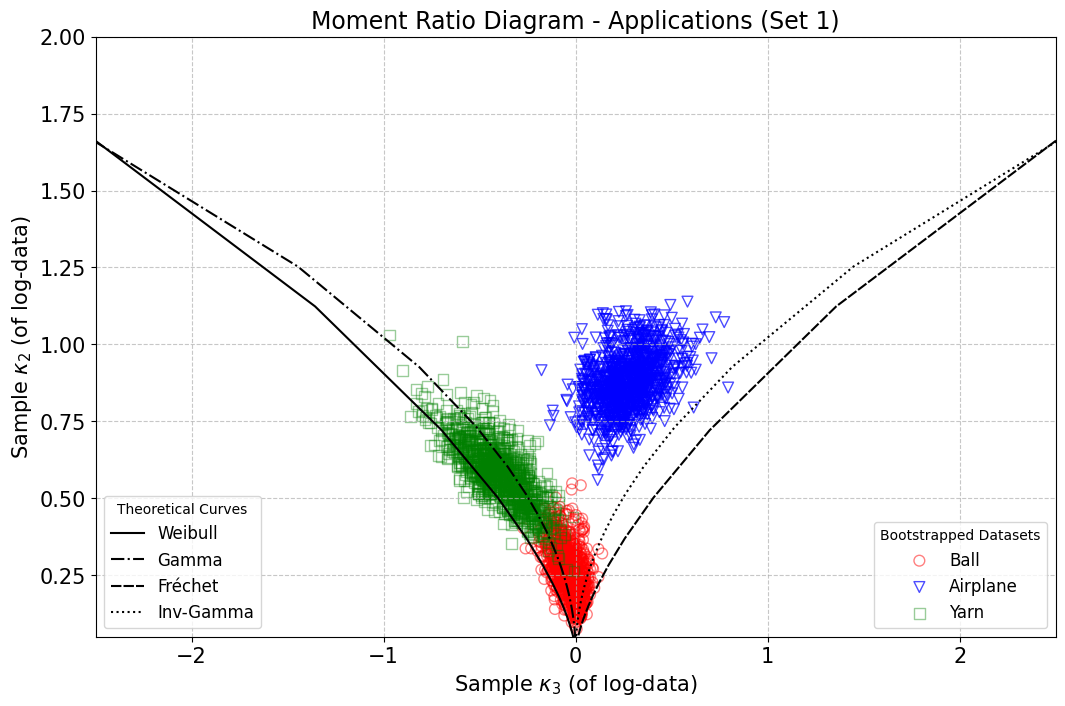

In [113]:
# --- SECTION: Plotting Application Data (Fig1b.png - First set of application data) ---

# 5. Plotting the distribution area with the first set of bootstrapped datasets.
font_size_plot = 15  # Font size for plot elements

# Creating a new figure and axes for this specific plot
fig_app1, ax_app1 = plt.subplots(figsize=(12, 8)) # Adjusted figure size for better legend space

# First group of plots: Theoretical distribution curves
# These handles (plot1_th, etc.) are for the legend of theoretical curves.
plot1_th, = ax_app1.plot(valores_k3_w, valores_k2_w, color="black", linestyle="solid", label="Weibull")
plot2_th, = ax_app1.plot(valores_k3_g, valores_k2_g, color="black", linestyle="dashdot", label="Gamma")
plot3_th, = ax_app1.plot(valores_k3_f, valores_k2_f, color="black", linestyle="dashed", dashes=(5, 1), label="Fréchet")
plot4_th, = ax_app1.plot(valores_k3_ll, valores_k2_ll, color="black", linestyle="dotted", label="Inv-Gamma")

# Creating the first legend for theoretical curves
# The handles must be the line objects returned by ax.plot
theoretical_handles_app1 = [plot1_th, plot2_th, plot3_th, plot4_th]
first_legend_app1 = ax_app1.legend(handles=theoretical_handles_app1, loc='lower left', fontsize=font_size_plot - 3, title="Theoretical Curves")
ax_app1.add_artist(first_legend_app1) # Add the first legend to the axes. Subsequent legends won't overwrite it.

# Second group of plots: Scatter plots for bootstrapped datasets
# The handles (plot5_app, etc.) are for the legend of bootstrapped data.
scatter_handles_app1 = []

# Retrieve K3, K2 values for the datasets to be plotted here
# Using the more descriptive variable names from the bootstrap sections.
# K3_1 (original) -> K3_ball_bootstrap
# K2_1 (original) -> K2_ball_bootstrap
# K3_2 (original) -> K3_air_bootstrap (labeled as 'Airplane' in original plot)
# K2_2 (original) -> K2_air_bootstrap
# K3_3 (original) -> K3_yarn_bootstrap
# K2_3 (original) -> K2_yarn_bootstrap

if K3_ball_bootstrap and K2_ball_bootstrap: # Check if lists are not empty
    plot5_app = ax_app1.scatter(K3_ball_bootstrap, K2_ball_bootstrap, marker='o', facecolors='none', color='red', label='Ball', alpha=0.5, s=60)
    scatter_handles_app1.append(plot5_app)

if K3_air_bootstrap and K2_air_bootstrap:
    plot6_app = ax_app1.scatter(K3_air_bootstrap, K2_air_bootstrap, marker='v', facecolors='none', color='blue', label='Airplane', alpha=0.7, s=60)
    scatter_handles_app1.append(plot6_app)

if K3_yarn_bootstrap and K2_yarn_bootstrap:
    plot7_app = ax_app1.scatter(K3_yarn_bootstrap, K2_yarn_bootstrap, marker='s', facecolors='none', color='green', label='Yarn', alpha=0.4, s=60)
    scatter_handles_app1.append(plot7_app)

# --- Commented out scatter plots from original script for Fig1b.png ---
# These would need their respective K3_X, K2_X variables (e.g., K3_tstrength_bootstrap) if uncommented.
# The original K3_6 corresponded to airplanewin_data, K3_9 to meeker_data.
# K3_4 -> K3_tstrength_bootstrap
# K3_5 -> K3_repairable_bootstrap
# K3_6 -> K3_airplanewin_bootstrap (original label 'AIR')
# K3_7 -> K3_acutebcancer_bootstrap
# K3_8 -> K3_pet_bootstrap
# K3_9 -> K3_meeker_bootstrap (original label 'RES')

# Example if you wanted to add 'Meeker' (originally K3_9, K2_9, labeled 'RES')
# if K3_meeker_bootstrap and K2_meeker_bootstrap:
#    plot_res_app = ax_app1.scatter(K3_meeker_bootstrap, K2_meeker_bootstrap, marker='x', facecolors='none', color='purple', label='Meeker (RES)', alpha=0.5, s=60)
#    scatter_handles_app1.append(plot_res_app)
# --- End of commented out examples ---

# Activating the second legend for the scatter plots (bootstrapped data)
if scatter_handles_app1: # Only create legend if there are handles
    second_legend_app1 = ax_app1.legend(handles=scatter_handles_app1, loc='lower right', fontsize=font_size_plot - 3, title="Bootstrapped Datasets")
    # ax_app1.add_artist(second_legend_app1) # This is not needed if it's the last legend call for the axes. plt.legend() manages it.

# Adjusting x-axis
ax_app1.set_xlabel("Sample $\\kappa_3$ (of log-data)", fontsize=font_size_plot)
ax_app1.tick_params(axis='x', labelsize=font_size_plot)
ax_app1.set_xlim(-2.5, 2.5)

# Adjusting y-axis
ax_app1.set_ylabel("Sample $\\kappa_2$ (of log-data)", fontsize=font_size_plot)
ax_app1.tick_params(axis='y', labelsize=font_size_plot)
ax_app1.set_ylim(0.05, 2.0)

# Adding a title and grid
ax_app1.set_title("Moment Ratio Diagram - Applications (Set 1)", fontsize=font_size_plot + 2)
ax_app1.grid(True, linestyle='--', alpha=0.7)

# Adjust subplot parameters
fig_app1.subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
fig_app1.savefig('Fig1b.png', dpi=1200)
#plt.close(fig_app1) # Close the figure

#print("Plot 'Fig1b.png' (Applications Set 1) saved.")

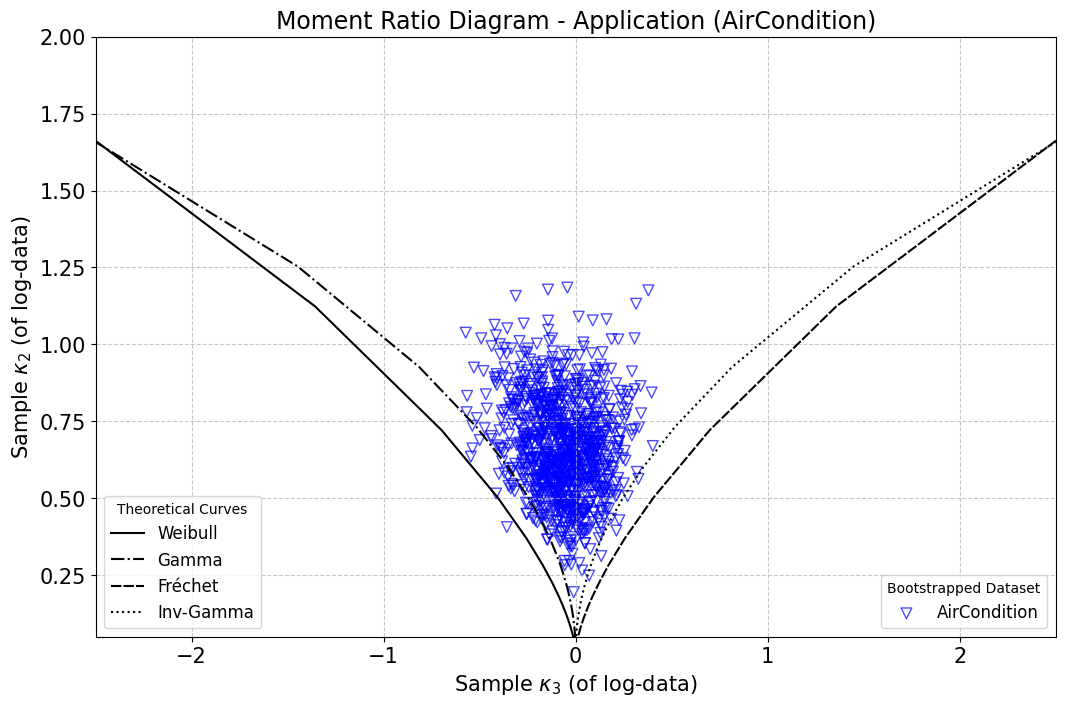

In [114]:
# --- SECTION: Plotting Application Data (Fig10.png - Second set of application data) ---

# 5. Plotting the distribution area with a specific bootstrapped dataset.
# This section appears to be designed to plot one dataset at a time,
# by uncommenting the desired dataset's scatter plot line.
font_size_plot = 15  # Font size for plot elements

# Creating a new figure and axes for this specific plot
fig_app2, ax_app2 = plt.subplots(figsize=(12, 8))

# First group of plots: Theoretical distribution curves
# These handles are for the legend of theoretical curves in this figure.
plot1_th_app2, = ax_app2.plot(valores_k3_w, valores_k2_w, color="black", linestyle="solid", label="Weibull")
plot2_th_app2, = ax_app2.plot(valores_k3_g, valores_k2_g, color="black", linestyle="dashdot", label="Gamma")
plot3_th_app2, = ax_app2.plot(valores_k3_f, valores_k2_f, color="black", linestyle="dashed", dashes=(5, 1), label="Fréchet")
plot4_th_app2, = ax_app2.plot(valores_k3_ll, valores_k2_ll, color="black", linestyle="dotted", label="Inv-Gamma")

# Creating the first legend for theoretical curves
theoretical_handles_app2 = [plot1_th_app2, plot2_th_app2, plot3_th_app2, plot4_th_app2]
first_legend_app2 = ax_app2.legend(handles=theoretical_handles_app2, loc='lower left', fontsize=font_size_plot - 3, title="Theoretical Curves")
ax_app2.add_artist(first_legend_app2)

# Second group of plots: Scatter plot for a selected bootstrapped dataset
# The original script had many commented lines here, selecting one dataset at a time.
# We will plot "AirCondition" data as it was the last uncommented one.
# Use the descriptive variable names (e.g., K3_aircondition_bootstrap).

scatter_handles_app2 = []
current_dataset_name_app2 = "AirCondition" # Default to AirCondition

# Retrieve K3, K2 values for the "AirCondition" dataset.
# K3_13 (original) -> K3_aircondition_bootstrap
# K2_13 (original) -> K2_aircondition_bootstrap
if K3_aircondition_bootstrap and K2_aircondition_bootstrap:
    plot_app_selected = ax_app2.scatter(K3_aircondition_bootstrap, K2_aircondition_bootstrap,
                                        marker='v', facecolors='none', color='blue',
                                        label=current_dataset_name_app2, alpha=0.7, s=60)
    scatter_handles_app2.append(plot_app_selected)
else:
    print(f"Warning: Data for '{current_dataset_name_app2}' is empty or not processed. Plot will be empty for this dataset.")


# --- To plot other datasets (as per original commented lines), uncomment and adapt one block at a time ---
# Remember to change 'current_dataset_name_app2' and the K3/K2 variables accordingly.
# For example, to plot "Kevlar" (originally K3_10, K2_10):
# current_dataset_name_app2 = "Kevlar"
# if K3_kevlar_bootstrap and K2_kevlar_bootstrap:
#    plot_app_selected = ax_app2.scatter(K3_kevlar_bootstrap, K2_kevlar_bootstrap,
#                                        marker='p', facecolors='none', color='purple',
#                                        label=current_dataset_name_app2, alpha=0.7, s=60)
#    scatter_handles_app2.append(plot_app_selected)
# --- End of example for other datasets ---

# Activating the second legend for the selected scatter plot
if scatter_handles_app2: # Only create legend if there are handles
    second_legend_app2 = ax_app2.legend(handles=scatter_handles_app2, loc='lower right', fontsize=font_size_plot - 3, title="Bootstrapped Dataset")
    # ax_app2.add_artist(second_legend_app2); # Not strictly necessary for the last legend

# Adjusting x-axis
ax_app2.set_xlabel("Sample $\\kappa_3$ (of log-data)", fontsize=font_size_plot)
ax_app2.tick_params(axis='x', labelsize=font_size_plot)
ax_app2.set_xlim(-2.5, 2.5)

# Adjusting y-axis
ax_app2.set_ylabel("Sample $\\kappa_2$ (of log-data)", fontsize=font_size_plot)
ax_app2.tick_params(axis='y', labelsize=font_size_plot)
ax_app2.set_ylim(0.05, 2.0)

# Adding a title and grid
ax_app2.set_title(f"Moment Ratio Diagram - Application ({current_dataset_name_app2})", fontsize=font_size_plot + 2)
ax_app2.grid(True, linestyle='--', alpha=0.7)

# Adjust subplot parameters
fig_app2.subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
fig_app2.savefig('Fig10.png', dpi=1200) # File name based on original script
#plt.close(fig_app2) # Close the figure

#print(f"Plot 'Fig10.png' (Application - {current_dataset_name_app2}) saved.")
#print("\n--- Script Execution Finished ---")

<ipython-input-118-1cbe5fa9dad6>:35: UserWarning: You passed a edgecolor/edgecolors ('olive') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plot_app = ax_all_apps.scatter(k3_values, k2_values,


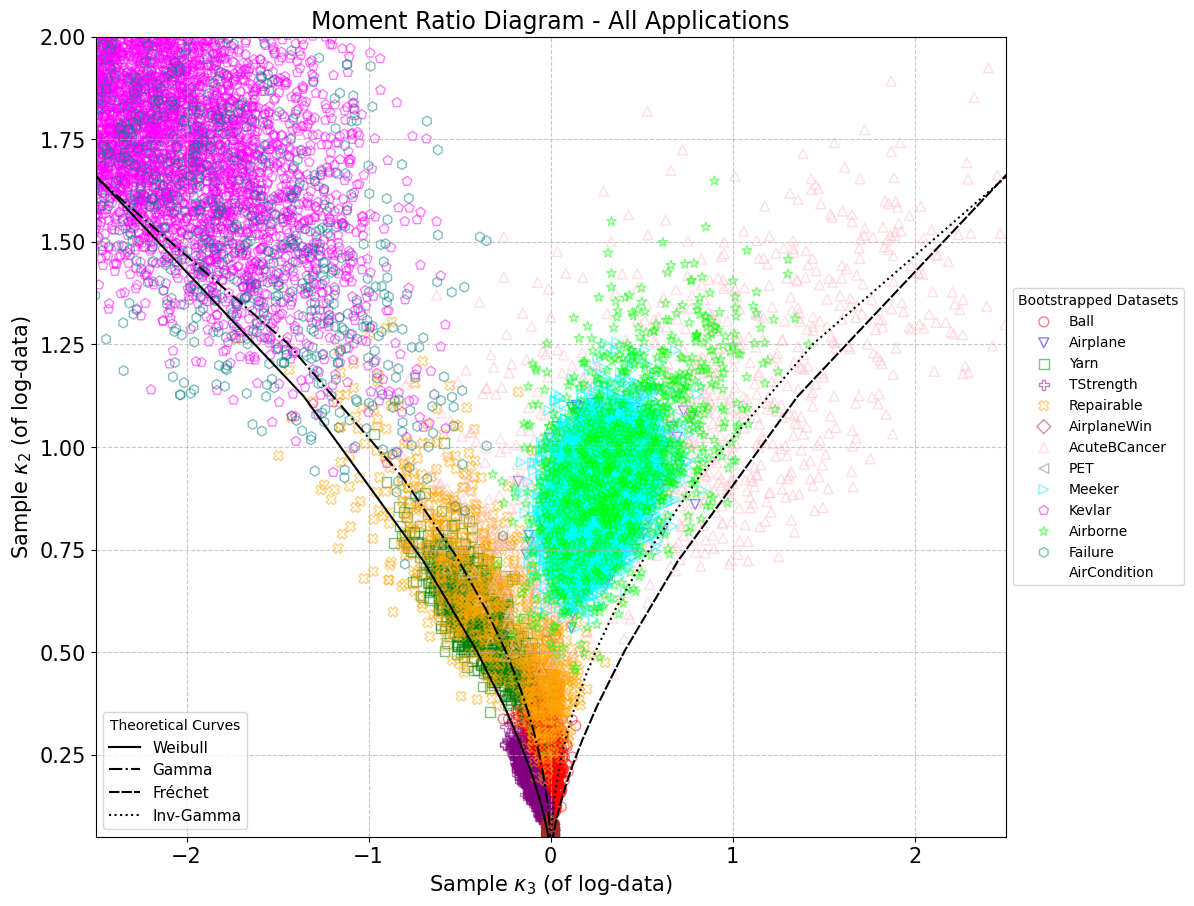

In [118]:
# --- SECTION: Plotting All Application Data on Theoretical Diagram (e.g., Fig_All_Applications.png) ---

font_size_plot = 15  # Font size for plot elements

# Creating a new figure and axes for this plot
fig_all_apps, ax_all_apps = plt.subplots(figsize=(14, 10)) # Increased figure size for many datasets

# 1. Plot Theoretical Distribution Curves
# These handles are for the legend of theoretical curves.
plot1_th_all, = ax_all_apps.plot(valores_k3_w, valores_k2_w, color="black", linestyle="solid", label="Weibull")
plot2_th_all, = ax_all_apps.plot(valores_k3_g, valores_k2_g, color="black", linestyle="dashdot", label="Gamma")
plot3_th_all, = ax_all_apps.plot(valores_k3_f, valores_k2_f, color="black", linestyle="dashed", dashes=(5, 1), label="Fréchet")
plot4_th_all, = ax_all_apps.plot(valores_k3_ll, valores_k2_ll, color="black", linestyle="dotted", label="Inv-Gamma")

# Creating the first legend for theoretical curves
theoretical_handles_all = [plot1_th_all, plot2_th_all, plot3_th_all, plot4_th_all]
first_legend_all = ax_all_apps.legend(handles=theoretical_handles_all, loc='lower left', fontsize=font_size_plot - 4, title="Theoretical Curves") # Smaller font for many items
ax_all_apps.add_artist(first_legend_all)

# 2. Plot Bootstrapped Datasets
# Define a list of markers and colors to cycle through for different datasets
markers_list = ['o', 'v', 's', 'P', 'X', 'D', '^', '<', '>', 'p', '*', 'h', '+', 'x', 'd']
colors_list = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta',
               'lime', 'teal', 'olive', 'navy', 'maroon'] # Add more if you have >15 datasets

scatter_handles_all_apps = []
dataset_index = 0

# Iterate through all processed datasets in bootstrap_k_values
for dataset_name, (k3_values, k2_values) in bootstrap_k_values.items():
    if k3_values and k2_values: # Check if there are results for this dataset
        marker_style = markers_list[dataset_index % len(markers_list)]
        color_style = colors_list[dataset_index % len(colors_list)]

        plot_app = ax_all_apps.scatter(k3_values, k2_values,
                                       marker=marker_style,
                                       facecolors='none',  # Make markers hollow
                                       edgecolors=color_style, # Use color for the edge
                                       label=dataset_name,
                                       alpha=0.5,  # Adjust alpha for better visibility if points overlap
                                       s=50)      # Adjust size of markers
        scatter_handles_all_apps.append(plot_app)
        dataset_index += 1
    else:
        print(f"Info: No bootstrap data to plot for '{dataset_name}'.")

# Creating the second legend for bootstrapped datasets
if scatter_handles_all_apps:
    # May need to adjust 'ncol' (number of columns) for the legend based on how many datasets there are.
    # loc='upper center' and bbox_to_anchor might be better for many items.
    second_legend_all = ax_all_apps.legend(handles=scatter_handles_all_apps,
                                           loc='center left', # Try different locations
                                           bbox_to_anchor=(1, 0.5), # Position legend outside plot
                                           fontsize=font_size_plot - 5, # Smaller font
                                           title="Bootstrapped Datasets",
                                           ncol=1) # Adjust columns as needed (e.g., 2 or 3)
    # Note: add_artist is not needed for the last legend call if you want it to be the main legend.
    # However, if you have two distinct legends, you use add_artist for the first one.
    # For many items, placing the legend outside is often clearer.

# Adjusting x-axis
ax_all_apps.set_xlabel("Sample $\\kappa_3$ (of log-data)", fontsize=font_size_plot)
ax_all_apps.tick_params(axis='x', labelsize=font_size_plot)
ax_all_apps.set_xlim(-2.5, 2.5)

# Adjusting y-axis
ax_all_apps.set_ylabel("Sample $\\kappa_2$ (of log-data)", fontsize=font_size_plot)
ax_all_apps.tick_params(axis='y', labelsize=font_size_plot)
ax_all_apps.set_ylim(0.05, 2.0)

# Adding a title and grid
ax_all_apps.set_title("Moment Ratio Diagram - All Applications", fontsize=font_size_plot + 2)
ax_all_apps.grid(True, linestyle='--', alpha=0.7)

# Adjust subplot parameters to prevent labels/legend from being cut off
# This might need tweaking depending on the number of legend items.
fig_all_apps.subplots_adjust(left=0.1, right=0.75, bottom=0.1, top=0.9) # Adjust 'right' for outside legend

# Save the figure
# You might want a different filename for this comprehensive plot
output_filename_all_apps = 'Fig_All_Applications.png'
fig_all_apps.savefig(output_filename_all_apps, dpi=1200, bbox_inches='tight') # bbox_inches='tight' can help with layout
#plt.close(fig_all_apps) # Close the figure

#print(f"Plot '{output_filename_all_apps}' (All Applications) saved.")
# The previous print statement for Fig10.png would be removed or adapted if Fig10.png is no longer generated in its old style.
# print(f"Plot 'Fig10.png' (Application - {current_dataset_name_app2}) saved.") # Remove or adapt this
#print("\n--- Script Execution Finished ---")

No bootstrap data to plot for 'Genfan'. Skipping individual plot.
No bootstrap data to plot for 'Carfibres'. Skipping individual plot.
No bootstrap data to plot for 'Air'. Skipping individual plot.


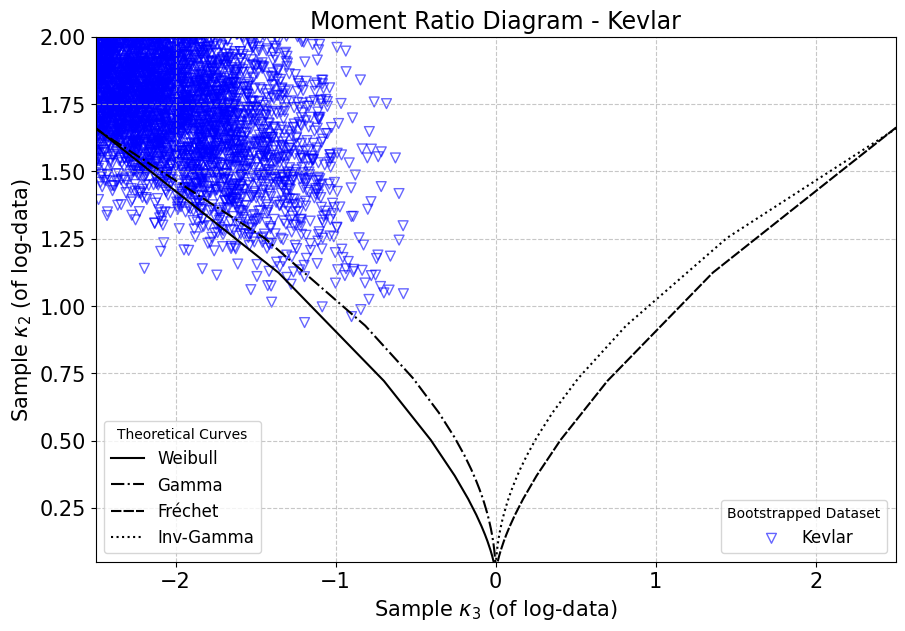

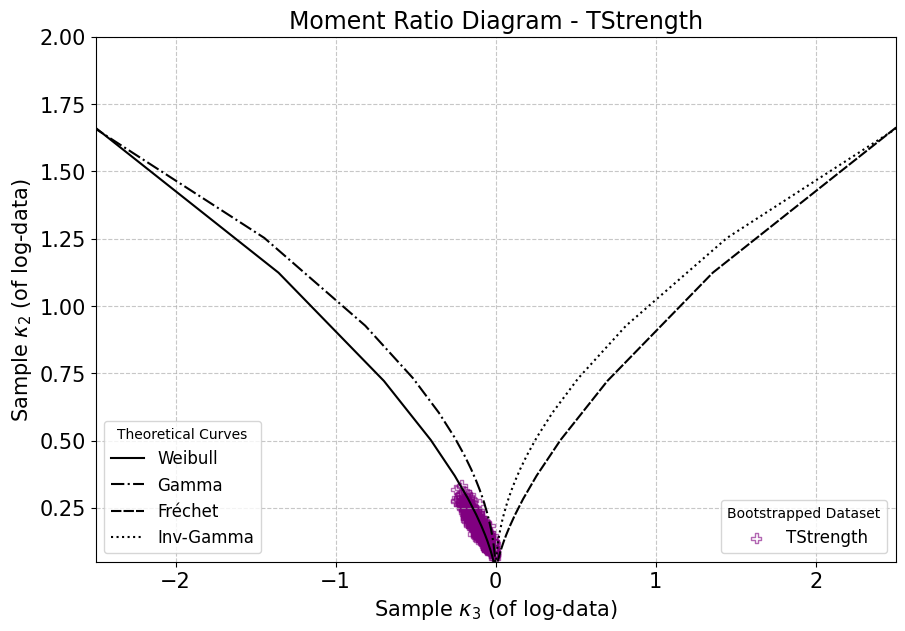

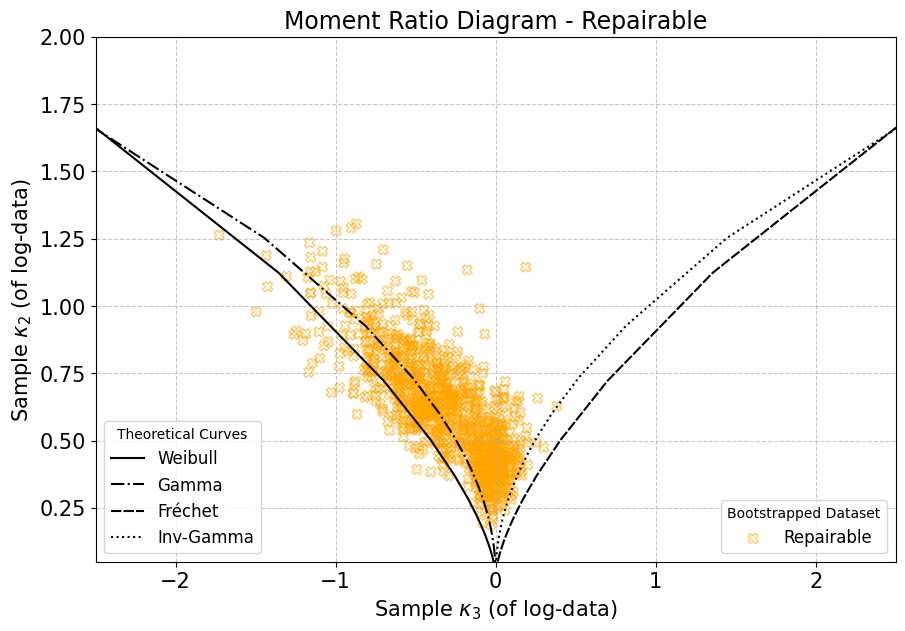

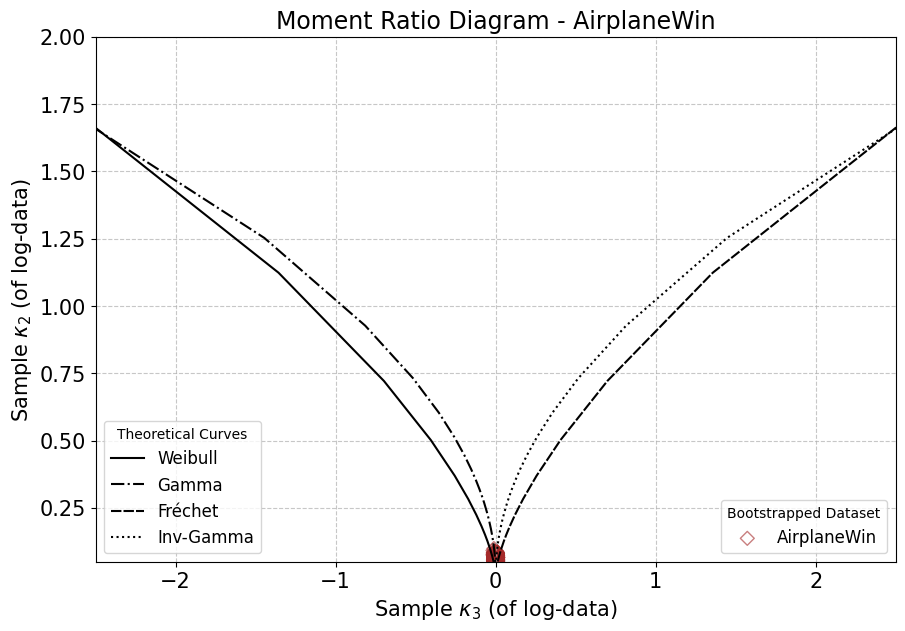

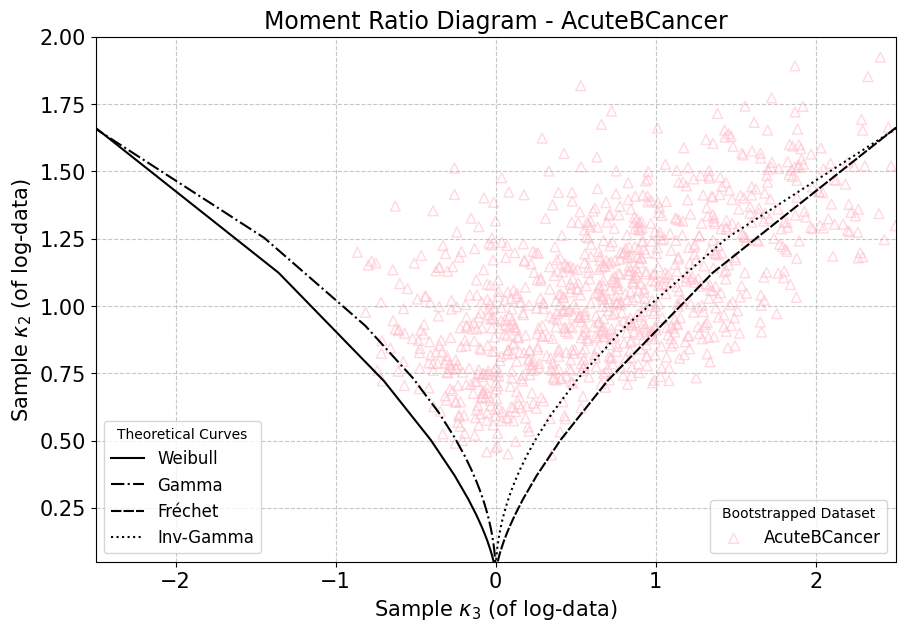

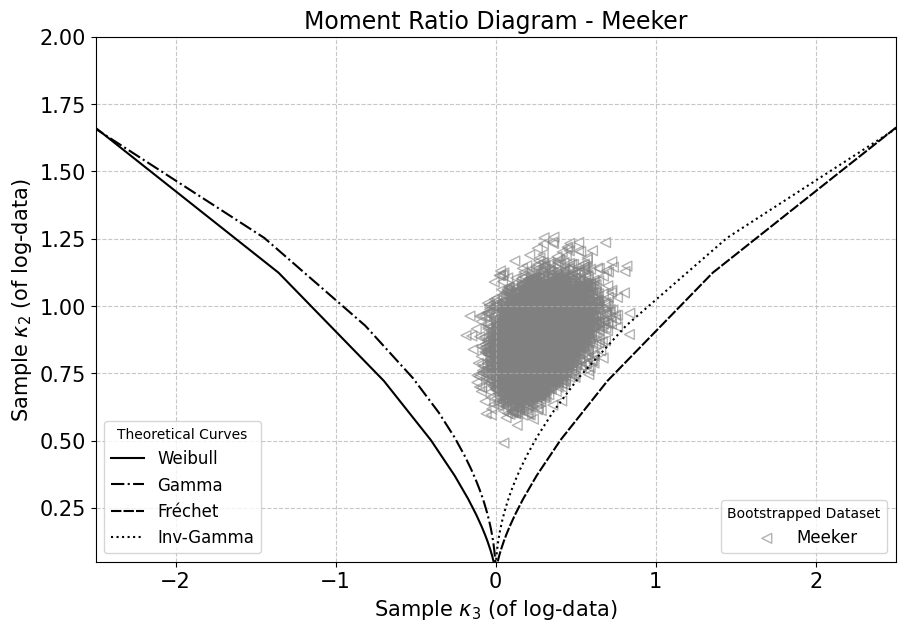

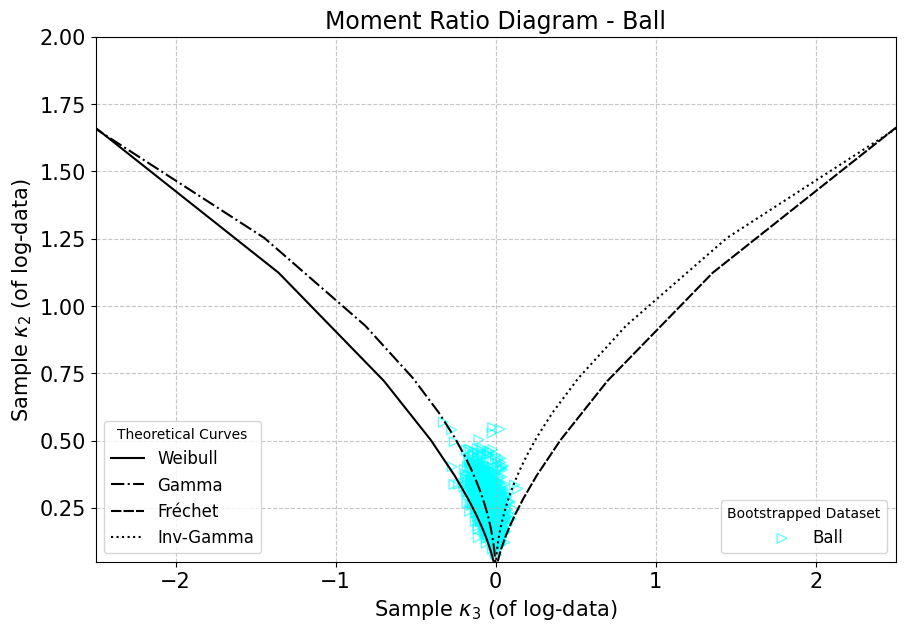

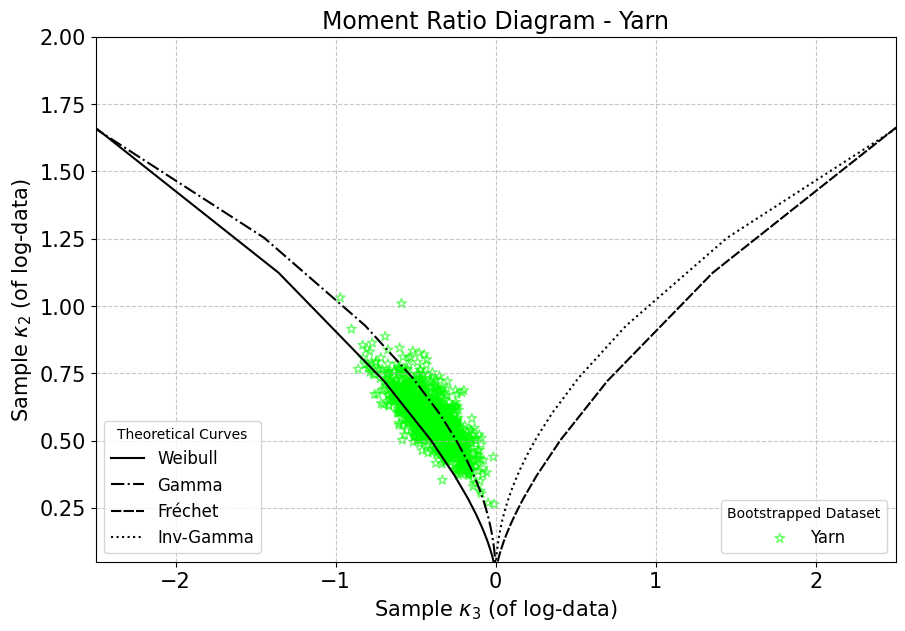

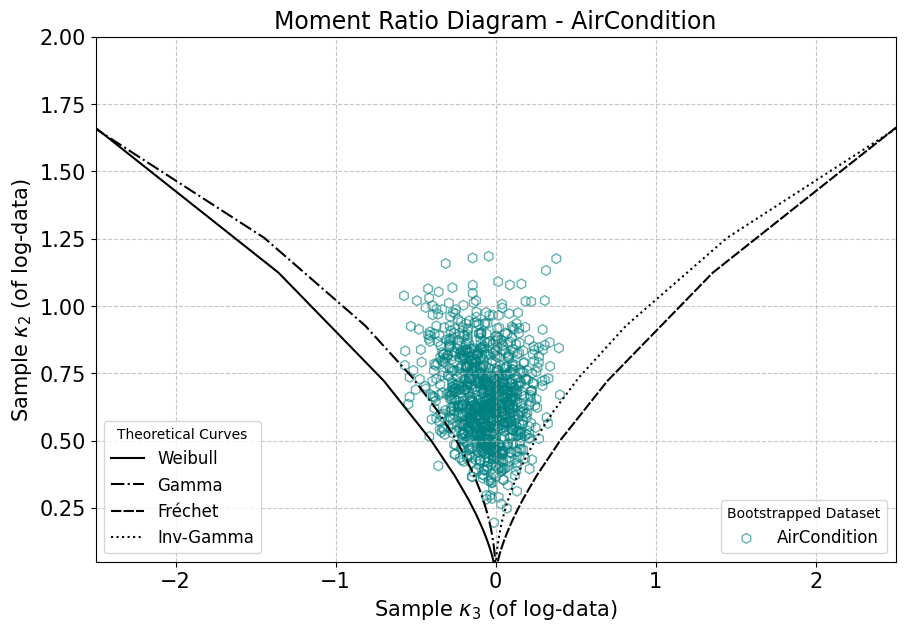

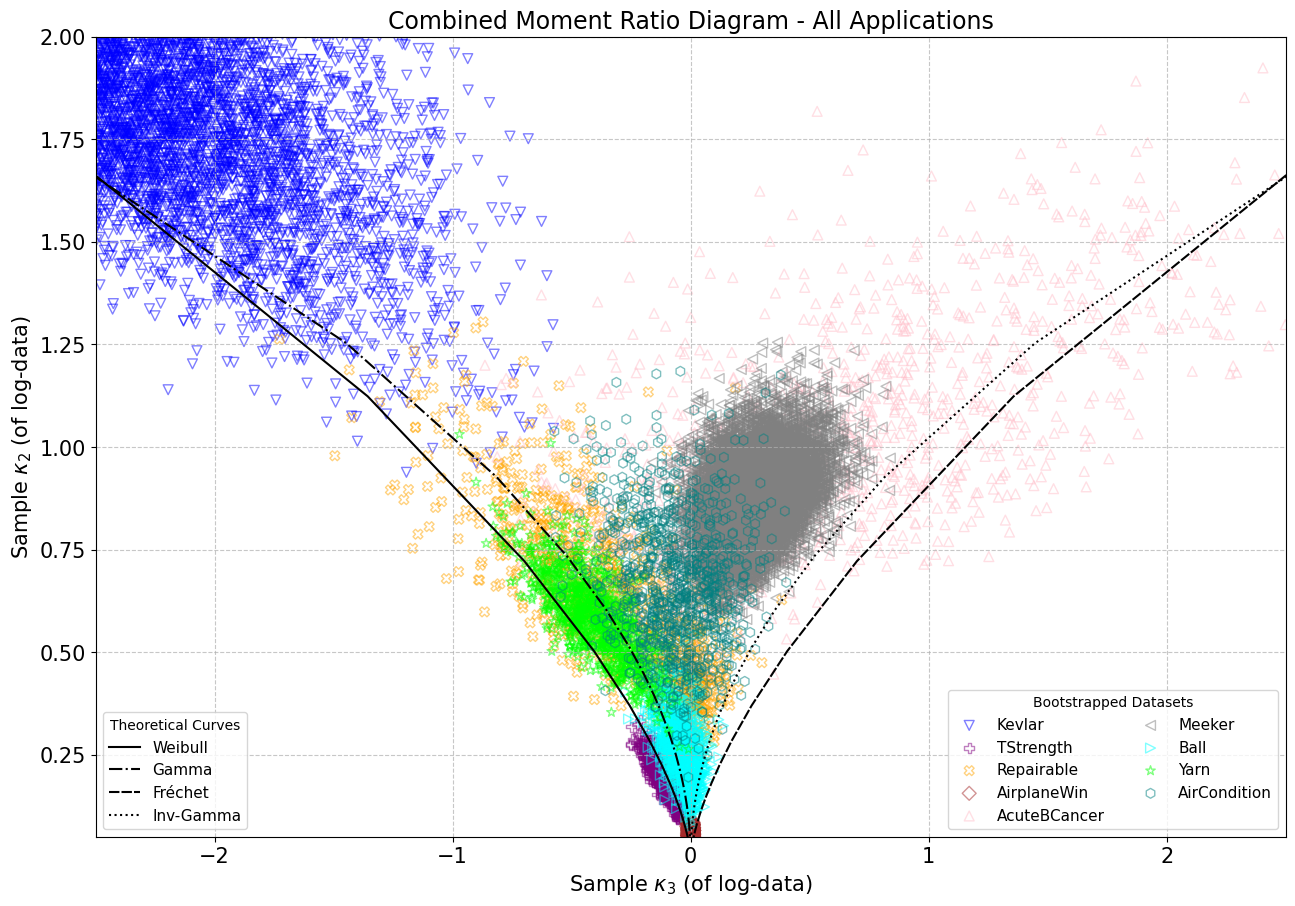

In [122]:
# --- SECTION: Plotting Individual Application Datasets on Theoretical Diagram ---
font_size_plot = 15  # Font size for plot elements

dataset_names_ordered = [ # To control plot order if desired, and for consistent naming
    "Genfan", "Kevlar", "Carfibres", "TStrength", "Repairable",
    "AirplaneWin", "AcuteBCancer", "Meeker", "Ball", "Air",
    "Yarn",  "AirCondition"
]

# Use distinct markers and colors for the combined plot later
markers_combined = ['o', 'v', 's', 'P', 'X', 'D', '^', '<', '>', 'p', '*', 'h', '+', 'x', 'd']
colors_combined = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta',
                   'lime', 'teal', 'olive', 'navy', 'maroon']


for i, dataset_name in enumerate(dataset_names_ordered):
    K3_vals, K2_vals = bootstrap_k_values.get(dataset_name, ([], []))

    if not K3_vals or not K2_vals:
        print(f"No bootstrap data to plot for '{dataset_name}'. Skipping individual plot.")
        continue

    fig_individual, ax_individual = plt.subplots(figsize=(10, 7))

    # Plot theoretical curves
    line_w_th, = ax_individual.plot(valores_k3_w, valores_k2_w, color="black", linestyle="solid", label="Weibull")
    line_g_th, = ax_individual.plot(valores_k3_g, valores_k2_g, color="black", linestyle="dashdot", label="Gamma")
    line_f_th, = ax_individual.plot(valores_k3_f, valores_k2_f, color="black", linestyle="dashed", dashes=(5, 1), label="Fréchet")
    line_ll_th, = ax_individual.plot(valores_k3_ll, valores_k2_ll, color="black", linestyle="dotted", label="Inv-Gamma")

    theoretical_handles = [line_w_th, line_g_th, line_f_th, line_ll_th]
    first_legend = ax_individual.legend(handles=theoretical_handles, loc='lower left', fontsize=font_size_plot - 3, title="Theoretical Curves")
    ax_individual.add_artist(first_legend)

    # Plot the current dataset's bootstrap results
    scatter_handle = ax_individual.scatter(K3_vals, K2_vals,
                                           marker=markers_combined[i % len(markers_combined)], # Use a consistent marker
                                           facecolors='none',
                                           color=colors_combined[i % len(colors_combined)], # Use a consistent color
                                           label=dataset_name, alpha=0.6, s=50)

    second_legend = ax_individual.legend(handles=[scatter_handle], loc='lower right', fontsize=font_size_plot - 3, title="Bootstrapped Dataset")
    # ax_individual.add_artist(second_legend) # Not strictly necessary for the last legend call

    ax_individual.set_xlabel("Sample $\\kappa_3$ (of log-data)", fontsize=font_size_plot)
    ax_individual.tick_params(axis='x', labelsize=font_size_plot)
    ax_individual.set_xlim(-2.5, 2.5)
    ax_individual.set_ylabel("Sample $\\kappa_2$ (of log-data)", fontsize=font_size_plot)
    ax_individual.tick_params(axis='y', labelsize=font_size_plot)
    ax_individual.set_ylim(0.05, 2.0)
    ax_individual.set_title(f"Moment Ratio Diagram - {dataset_name}", fontsize=font_size_plot + 2)
    ax_individual.grid(True, linestyle='--', alpha=0.7)

    fig_individual.subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
    file_name_individual = f"Fig_App_{dataset_name.replace(' ', '_')}.png" # Create a unique filename
    fig_individual.savefig(file_name_individual, dpi=1200)
   # plt.close(fig_individual)
    #print(f"Plot '{file_name_individual}' saved.")


# --- SECTION: Plotting Combined Application Datasets on Theoretical Diagram ---
fig_combined, ax_combined = plt.subplots(figsize=(14, 10)) # Larger figure for combined plot

# Plot theoretical curves
line_w_th_comb, = ax_combined.plot(valores_k3_w, valores_k2_w, color="black", linestyle="solid", label="Weibull")
line_g_th_comb, = ax_combined.plot(valores_k3_g, valores_k2_g, color="black", linestyle="dashdot", label="Gamma")
line_f_th_comb, = ax_combined.plot(valores_k3_f, valores_k2_f, color="black", linestyle="dashed", dashes=(5, 1), label="Fréchet")
line_ll_th_comb, = ax_combined.plot(valores_k3_ll, valores_k2_ll, color="black", linestyle="dotted", label="Inv-Gamma")

theoretical_handles_comb = [line_w_th_comb, line_g_th_comb, line_f_th_comb, line_ll_th_comb]
first_legend_comb = ax_combined.legend(handles=theoretical_handles_comb, loc='lower left', fontsize=font_size_plot - 4, title="Theoretical Curves") # Smaller font for more datasets
ax_combined.add_artist(first_legend_comb)

# Plot all bootstrapped datasets
scatter_handles_combined = []
for i, dataset_name in enumerate(dataset_names_ordered):
    K3_vals, K2_vals = bootstrap_k_values.get(dataset_name, ([], []))
    if K3_vals and K2_vals:
        scatter_plot = ax_combined.scatter(K3_vals, K2_vals,
                                           marker=markers_combined[i % len(markers_combined)],
                                           facecolors='none',
                                           color=colors_combined[i % len(colors_combined)],
                                           label=dataset_name, alpha=0.5, s=50)
        scatter_handles_combined.append(scatter_plot)

if scatter_handles_combined:
    # Adjust ncol for legend based on number of datasets to avoid clutter
    num_cols_legend = 2 if len(scatter_handles_combined) > 5 else 1
    second_legend_comb = ax_combined.legend(handles=scatter_handles_combined, loc='lower right',
                                            fontsize=font_size_plot - 4, title="Bootstrapped Datasets",
                                            ncol=num_cols_legend)

ax_combined.set_xlabel("Sample $\\kappa_3$ (of log-data)", fontsize=font_size_plot)
ax_combined.tick_params(axis='x', labelsize=font_size_plot)
ax_combined.set_xlim(-2.5, 2.5)
ax_combined.set_ylabel("Sample $\\kappa_2$ (of log-data)", fontsize=font_size_plot)
ax_combined.tick_params(axis='y', labelsize=font_size_plot)
ax_combined.set_ylim(0.05, 2.0)
ax_combined.set_title("Combined Moment Ratio Diagram - All Applications", fontsize=font_size_plot + 2)
ax_combined.grid(True, linestyle='--', alpha=0.7)

fig_combined.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.95) # Adjust padding
fig_combined.savefig('Fig_Applications_Combined.png', dpi=1200)
#plt.close(fig_combined)
#print("Plot 'Fig_Applications_Combined.png' saved.")

#print("\n--- Script Execution Finished ---")